## Problem Statement

### Business context

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most. The ultimate reward for dedication and loyalty towards an organization and the HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data on the promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.


### Objective

For the upcoming appraisal cycle, the HR team wants to utilize the stored data and leverage machine learning to make a model that will predict if a person is eligible for promotion or not. You, as a data scientist at JMD company, need to come up with the best possible model that will help the HR team to predict if a person is eligible for promotion or not.


### Data Description

- employee_id: Unique ID for the employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other training completed in the previous year on soft skills, technical skills, etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during the previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [3]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [4]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

In [5]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To impute missing values
from sklearn.impute import SimpleImputer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [6]:
promotion = pd.read_csv("employee_promotion.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [7]:
# Checking the number of rows and columns in the training data
promotion.shape ##  Complete the code to view dimensions of the train data

(54808, 13)

In [8]:
# let's create a copy of the data
data = promotion.copy()

### Displaying the first few rows of the dataset

In [9]:
# let's view the first 5 rows of the data
data.head() ##  Complete the code to view top 5 rows of the data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0


In [10]:
# let's view the last 5 rows of the data
data.tail() ##  Complete the code to view last 5 rows of the data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.000,17,0,78.000,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.000,6,0,56.000,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.000,3,0,79.000,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.000,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.000,5,0,49.000,0


### Checking the data types of the columns for the dataset

In [11]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


Data Composition: Includes six integer (int64), two floating-point (float64), and five object (string) data types, offering a balanced mix of quantitative metrics and qualitative descriptions for comprehensive employee analysis.

Missing Values:

Education: 569 missing values.
Previous Year Rating: 7,424 missing values.
Average Training Score: 3,286 missing values.
These missing entries must be addressed to ensure accurate modeling and analysis.
Key Attributes:

Employee ID: Serves as a unique identifier for each employee.
Performance Indicators: Previous Year Rating and Average Training Score are crucial for predicting promotion outcomes.
Target Variable: Is Promoted indicates the promotion status, which is the primary focus of the predictive model.
Memory Efficiency: The dataset is memory efficient, using only about 5.4 MB, facilitating extensive data manipulation and modeling without significant resource demands.

### Checking for duplicate values

In [12]:
# let's check for duplicate values in the data
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

### Checking for missing values

In [13]:
# let's check for missing values in the data
data.isnull().sum() ##  Complete the code to check missing entries in the train data

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

Education: 2,409 missing values, highlighting a gap in educational background information.

Previous Year Rating: 4,124 missing values, indicating potential discrepancies in performance evaluation records.

Average Training Score: 2,560 missing values, which may affect assessments of employee skills and training effectiveness.

### Statistical summary of the dataset

In [14]:
# let's view the statistical summary of the numerical columns in the data
data.describe() ##  Complete the code to print the statitical summary of the train data

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000,54808.000,54808.000,50684.000,54808.000,54808.000,52248.000,54808.000
mean,39195.831,1.253,34.804,3.329,5.866,0.023,63.712,0.085
std,22586.581,0.609,7.660,1.260,4.265,0.150,13.522,0.279
min,1.000,1.000,20.000,1.000,1.000,0.000,39.000,0.000
25%,19669.750,1.000,29.000,3.000,3.000,0.000,51.000,0.000
50%,39225.500,1.000,33.000,3.000,5.000,0.000,60.000,0.000
75%,58730.500,1.000,39.000,4.000,7.000,0.000,77.000,0.000
max,78298.000,10.000,60.000,5.000,37.000,1.000,99.000,1.000


In [15]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.000,39195.831,22586.581,1.000,19669.750,39225.500,58730.500,78298.000
no_of_trainings,54808.000,1.253,0.609,1.000,1.000,1.000,1.000,10.000
age,54808.000,34.804,7.660,20.000,29.000,33.000,39.000,60.000
previous_year_rating,50684.000,3.329,1.260,1.000,3.000,3.000,4.000,5.000
length_of_service,54808.000,5.866,4.265,1.000,3.000,5.000,7.000,37.000
awards_won,54808.000,0.023,0.150,0.000,0.000,0.000,0.000,1.000
avg_training_score,52248.000,63.712,13.522,39.000,51.000,60.000,77.000,99.000
is_promoted,54808.000,0.085,0.279,0.000,0.000,0.000,0.000,1.000


**Let's check the number of unique values in each column**

In [16]:
data.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
awards_won                  2
avg_training_score         59
is_promoted                 2
dtype: int64

- Employee ID: 54,808 unique values, confirming each employee has a unique identifier.
- Department: 9 unique departments.
- Region: 34 unique regions, indicating a broad geographic distribution.
- Education: 3 unique education levels.
- Gender: 2 unique genders.
- Recruitment Channel: 3 unique recruitment channels.
- Number of Trainings: 10 unique values, showing diversity in training participation.
- Age: 41 unique age values, reflecting a wide age range among employees.
- Previous Year Rating: 5 unique ratings.
- Length of Service: 35 unique values, indicating varied tenure among employees.
- Awards Won: 2 unique values (binary).
- Average Training Score: 59 unique scores.
- Is Promoted: 2 unique values (binary), representing the target variable.

In [17]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in department are :
department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
**************************************************
Unique values in region are :
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34

In [18]:
# ID column consists of uniques ID for clients and hence will not add value to the modeling
data.drop(columns="employee_id", inplace=True)

In [19]:
data["is_promoted"].value_counts(1)

is_promoted
0   0.915
1   0.085
Name: proportion, dtype: float64

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [23]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

#### Observations on No. of Trainings

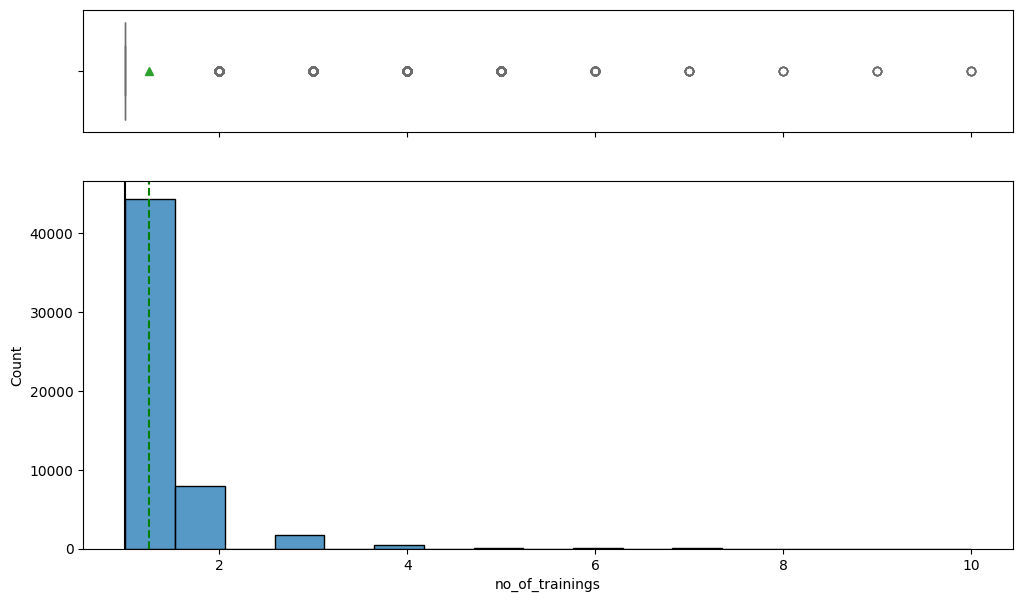

In [24]:
histogram_boxplot(data, "no_of_trainings")

- Dominant Single Training: A vast majority of employees have undergone only 1 or 2 training sessions, with the count drastically decreasing for higher numbers of trainings.
- Low Variability: The data shows low variability in training numbers, with very few employees attending more than 2 trainings.
- Outliers: There are outliers present, indicating a small number of employees have attended significantly more trainings (up to 10), which is well above the average.
- Skewed Distribution: The distribution is highly right-skewed, reflecting that fewer trainings per employee are the norm, with only a few exceptions.

**Let's see the distribution of age of employee**

#### Observations on Age

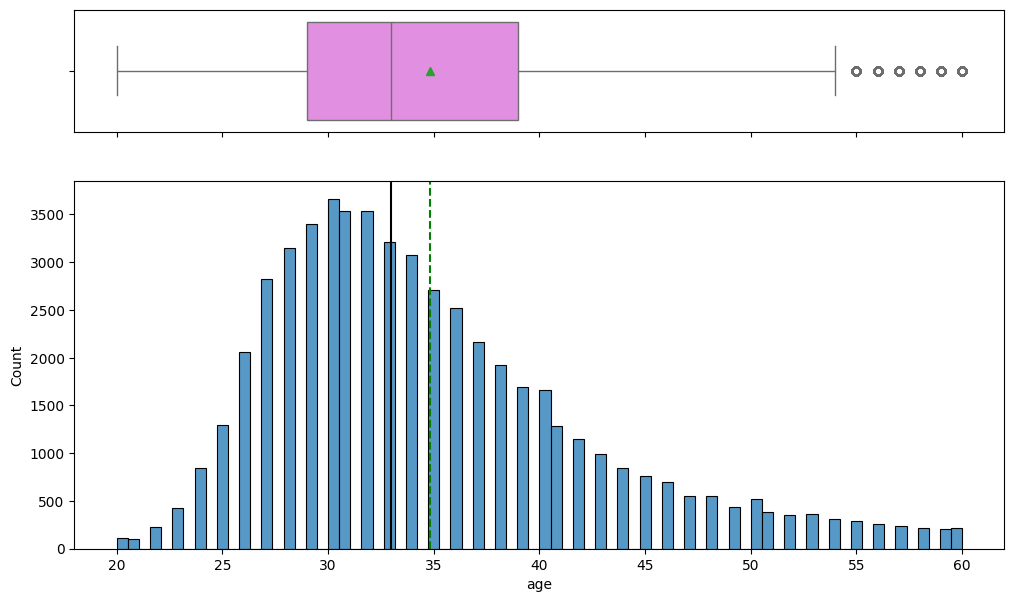

In [25]:
histogram_boxplot(data, "age")  ## Complete the code to create histogram_boxplot for 'age'

- Age Distribution: The distribution of age among employees is roughly bell-shaped, suggesting a normal distribution, with most employees aged between 25 and 40.
- Median Age: The median age, marked by the green dashed line in the histogram, is around 35 years, indicating that half of the employees are younger and half are older than this age.
- Common Range: The majority of employees fall within the interquartile range (IQR) depicted by the pink box in the boxplot, spanning approximately from early 30s to late 30s.
- Outliers: The boxplot shows a few outliers above the age of 55, indicating that there are employees significantly older than the general employee population.

#### Observations on Length of Service

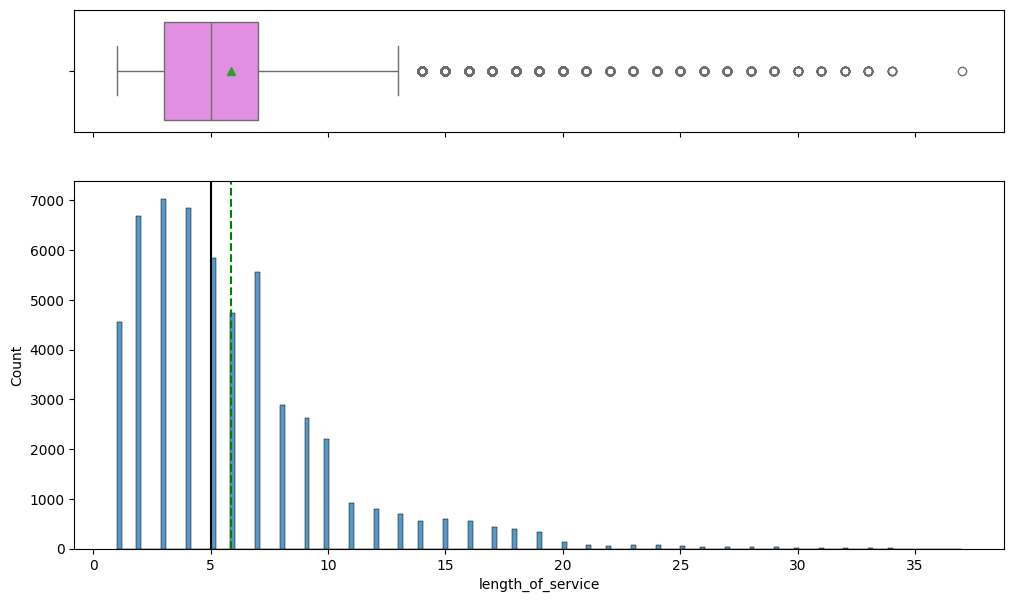

In [26]:
histogram_boxplot(data, "length_of_service")  ## Complete the code to create histogram_boxplot for 'length_of_service'

- Length of Service Distribution: The distribution is right-skewed, with the majority of employees having between 1 and 10 years of service.
- Median Length of Service: The median length of service, indicated by the green dashed line, is around 5 years, suggesting that half of the employees have fewer than 5 years of service and the other half more.
- Common Tenure Range: Most employees fall within the interquartile range (IQR) depicted by the pink box in the boxplot, which spans from approximately 3 to 7 years.
- Long-Term Employees: There are several outliers indicating the presence of employees with significantly longer tenure, up to 35 years, which highlights a subset of highly experienced staff.

**Let's see the distribution of average training score of employee**

#### Observations on Average Training Score

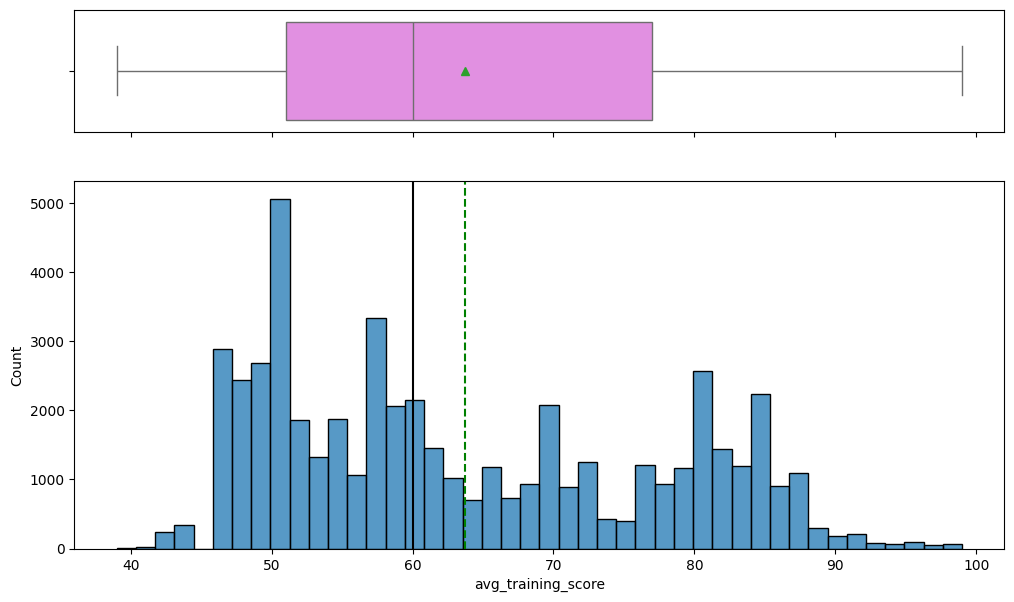

In [27]:
histogram_boxplot(data, "avg_training_score")  ## Complete the code to create histogram_boxplot for 'avg_training_score'

- Score Distribution: The distribution of average training scores shows multiple peaks, indicating varied performance levels across different groups or departments within the organization.
- Median Score: The median average training score, indicated by the green dashed line, is around 60. This central value suggests that half of the employees score below and half above this point.
- Score Range: The majority of scores fall within the interquartile range (IQR) shown by the pink box in the boxplot, approximately between 50 and 70.
- Performance Outliers: There are several outliers on the higher end, suggesting that a small number of employees achieve scores significantly above the norm, possibly indicating high performers or a different training regimen.

#### Observations on Department

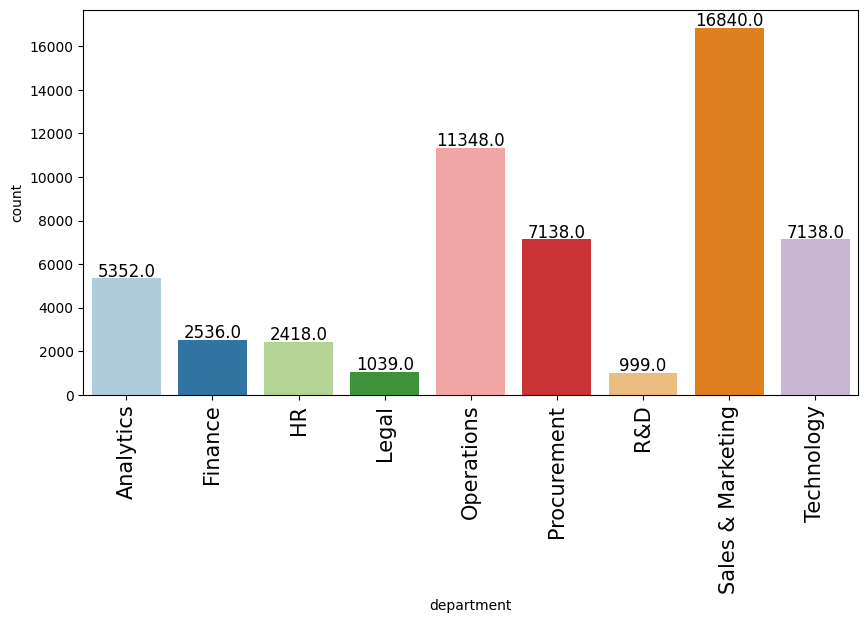

In [28]:
labeled_barplot(data, "department")

- Department Size Variation: There is a significant variation in the number of employees across different departments. Technology and Operations departments have the highest number of employees, with counts of 16,840 and 11,348 respectively.
- Smaller Departments: Legal and Finance departments have relatively few employees, with counts of 1,039 and 2,536 respectively, indicating smaller operations or specialized roles.
- Middle Range Departments: Sales & Marketing and Procurement are moderately sized, each with around 7,138 employees.
- Diverse Distribution: The varied department sizes suggest a diverse organizational structure with potentially differing roles, responsibilities, and impact on the organization.

#### Observations on Education

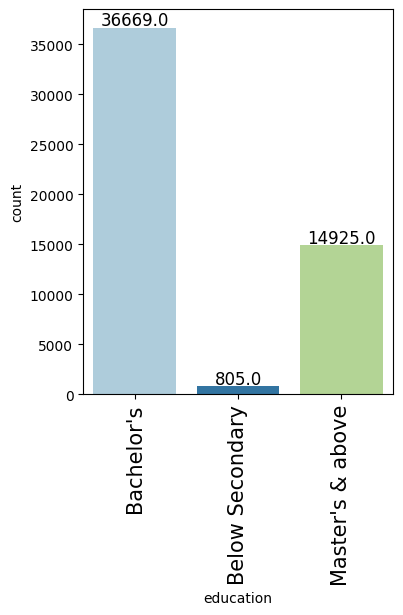

In [29]:
labeled_barplot(data, "education") ## Complete the code to create labeled_barplot for 'education'

- Dominant Education Level: The majority of employees hold a Bachelor's degree, totaling 36,669, indicating that this is the most common educational qualification within the company.
- Advanced Degrees: A substantial number, 14,925 employees, have a Master's degree or higher, reflecting a significant presence of highly educated staff.
- Lower Education Levels: Only a small fraction of the workforce, 805 employees, have an education level below secondary, suggesting minimal representation of this group within the company.

#### Observations on Gender

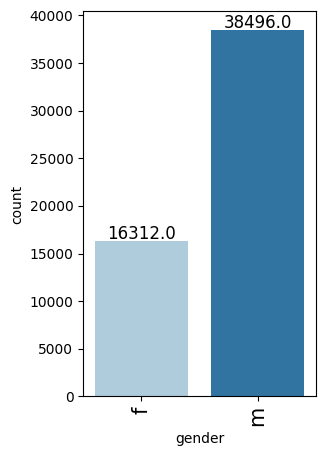

In [30]:
labeled_barplot(data, "gender") ## Complete the code to create labeled_barplot for 'gender'

- Gender Distribution: The dataset shows a higher number of female employees (38,496) compared to male employees (16,312), indicating a female-majority workforce.
- Workforce Diversity: The significant difference in numbers between genders might reflect the organization's hiring practices, workplace diversity, or sector-specific demographic trends.
- Implications for Policy: Understanding this gender distribution can be crucial for developing gender-specific policies, diversity initiatives, and inclusion strategies within the company.

#### Observations on Recruitment Channel

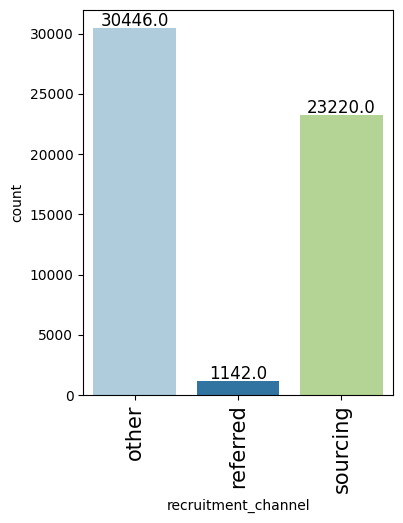

In [31]:
labeled_barplot(data, "recruitment_channel") ## Complete the code to create labeled_barplot for 'recruitment_channel'

- Primary Recruitment Channels: The two dominant channels for recruitment are 'sourcing' (23,220 employees) and 'other' (30,446 employees), which significantly exceed the number of employees recruited through 'referred' (1,142 employees).
- Reliance on Direct Sourcing: The company heavily relies on direct sourcing methods, potentially indicating a proactive approach in talent acquisition.
- Low Referral Rates: The relatively low number of referred employees suggests that employee referral programs may be underutilized or less emphasized within the organization's recruitment strategy.

#### Observations on Previous Year Rating

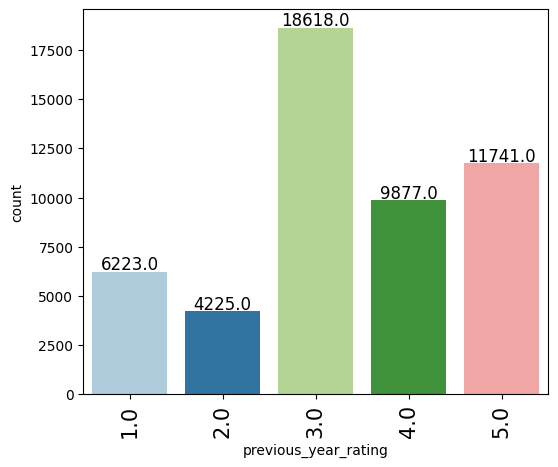

In [32]:
labeled_barplot(data, "previous_year_rating") ## Complete the code to create labeled_barplot for 'previous_year_rating'


- Rating Distribution: The majority of employees received a rating of 3 (18,618 employees), making it the most common performance rating within the company.
- High and Low Ratings: Ratings of 1 and 2 are less common, with counts of 6,223 and 4,225 respectively, suggesting fewer employees receive the lowest performance evaluations.
- Upper Ratings: A significant number of employees also received higher ratings of 4 and 5, with counts of 9,877 and 11,741 respectively, indicating a good performance level among a large section of the workforce.
- Performance Insights: The distribution of ratings suggests a bell curve-like pattern with a concentration around the middle rating, indicating standard performance management practices where most employees meet expectations.

#### Observations on Awards Won

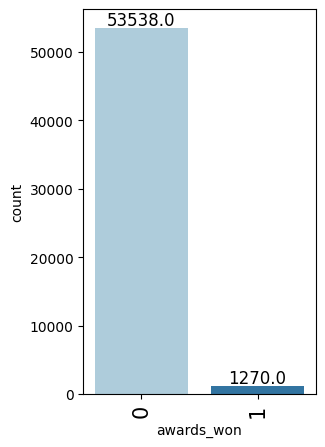

In [33]:
labeled_barplot(data, "awards_won") ## Complete the code to create labeled_barplot for 'awards_won'

- Awards Rarity: A vast majority of employees (53,538) have not won any awards, indicating that receiving an award is a rare achievement within the company.
- Award Winners: Only a small fraction of the workforce, 1,270 employees, have won awards, highlighting these individuals as exceptional performers.
- Recognition Distribution: The significant disparity between award winners and non-winners suggests that the company's awards are highly selective or given for outstanding achievements.

#### Observations on Region

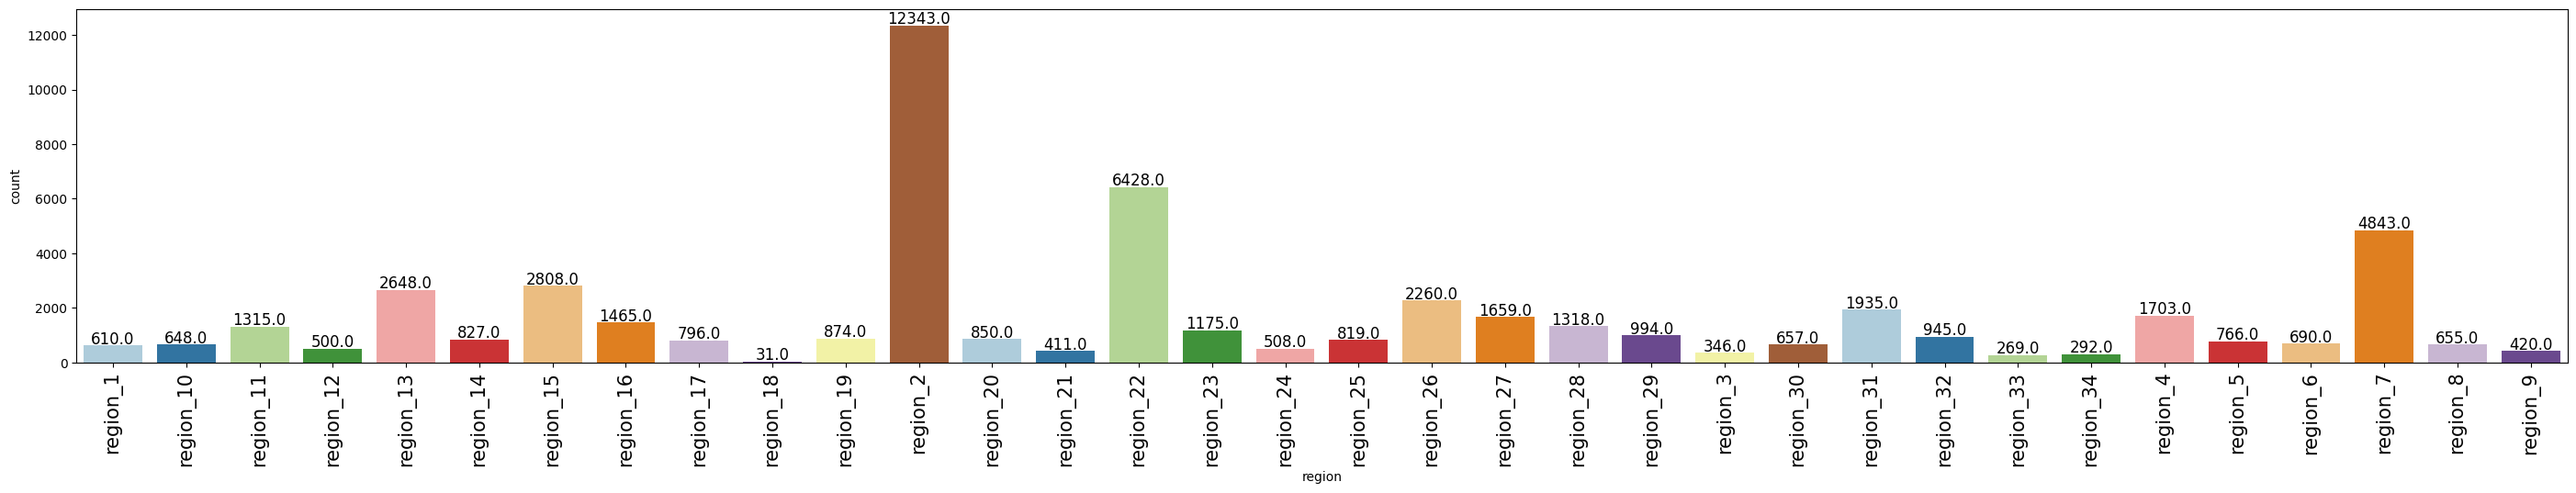

In [34]:
labeled_barplot(data, "region") ## Complete the code to create labeled_barplot for 'region'

- Uneven Regional Distribution: The number of employees varies significantly across regions, with Region 2 having the highest count (12,343 employees) and Region 18 among the lowest (31 employees).
- High Concentration in Few Regions: Regions like Region 2, Region 22 (6,428 employees), and Region 7 (4,843 employees) show a high concentration of employees, indicating major operational hubs or larger workforce presence.
- Minor Representation in Some Regions: Several regions, such as Region 18, Region 31 (45 employees), and Region 30 (346 employees), have very few employees, which could be due to smaller operational needs or newer establishment stages in these areas.
- Regional Implications: The diversity in regional employee distribution may reflect the company's strategic placement of resources, market focus, or regional employment opportunities.

#### Observations on target variable

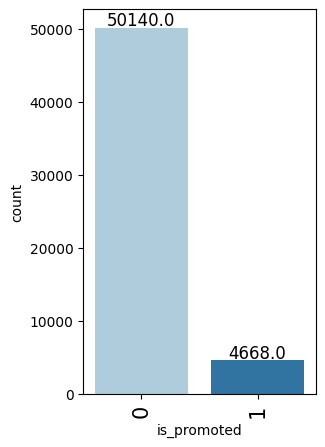

In [35]:
labeled_barplot(data, "is_promoted") ## Complete the code to create labeled_barplot for 'is_promoted'

- Promotion Rarity: A significant majority of employees (50,140) have not been promoted, indicating that promotions within the company are relatively rare.
- Promotion Rate: Only 4,668 employees have been promoted, showcasing a low promotion rate compared to the total employee count.
- Insights into Employee Advancement: The stark contrast between promoted and not promoted employees highlights the competitive nature or stringent criteria for advancement within the organization.

### Bivariate Analysis

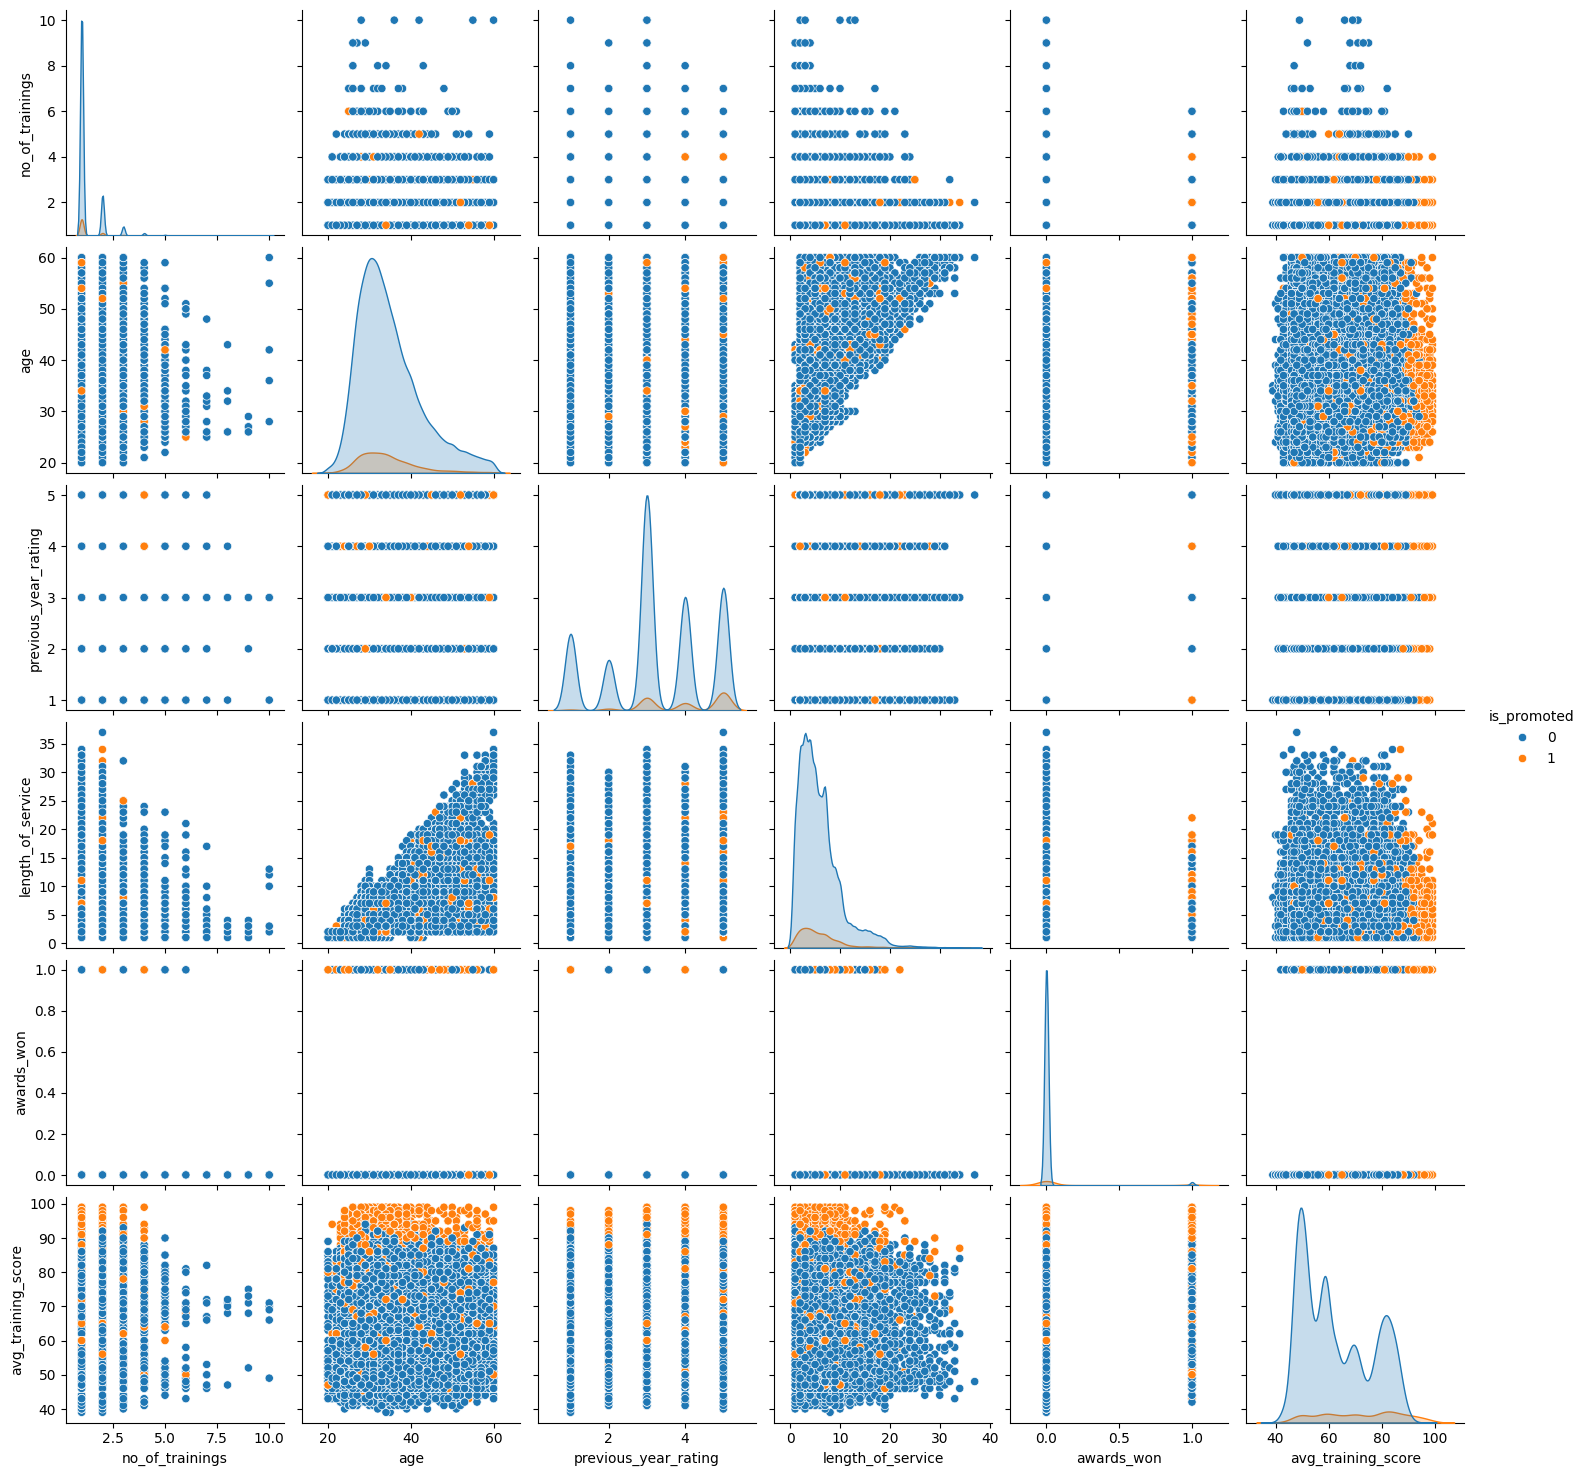

In [36]:
sns.pairplot(data, hue="is_promoted")

No. of Trainings vs. Promotion:

Employees with fewer trainings appear more frequently among those promoted, suggesting that quality over quantity of training might be a significant factor.
Age vs. Promotion:

The distribution of age among promoted and non-promoted employees is similar, indicating that age may not be a decisive factor in promotion decisions.
Previous Year Rating vs. Promotion:

There's a clear trend showing higher promotion rates among employees with higher previous year ratings, highlighting the importance of performance evaluations in promotion decisions.
Length of Service vs. Promotion:

Longer tenure does not necessarily correlate with higher promotion rates. In fact, employees with moderate tenure lengths appear more likely to be promoted than those with very long tenures.
Awards Won vs. Promotion:

Employees who have won awards are significantly more likely to be promoted, underscoring the impact of recognition on promotion decisions.
Average Training Score vs. Promotion:

Higher training scores are associated with a greater likelihood of promotion, suggesting that skill and knowledge development are critical to career progression.

#### Target variable vs Age

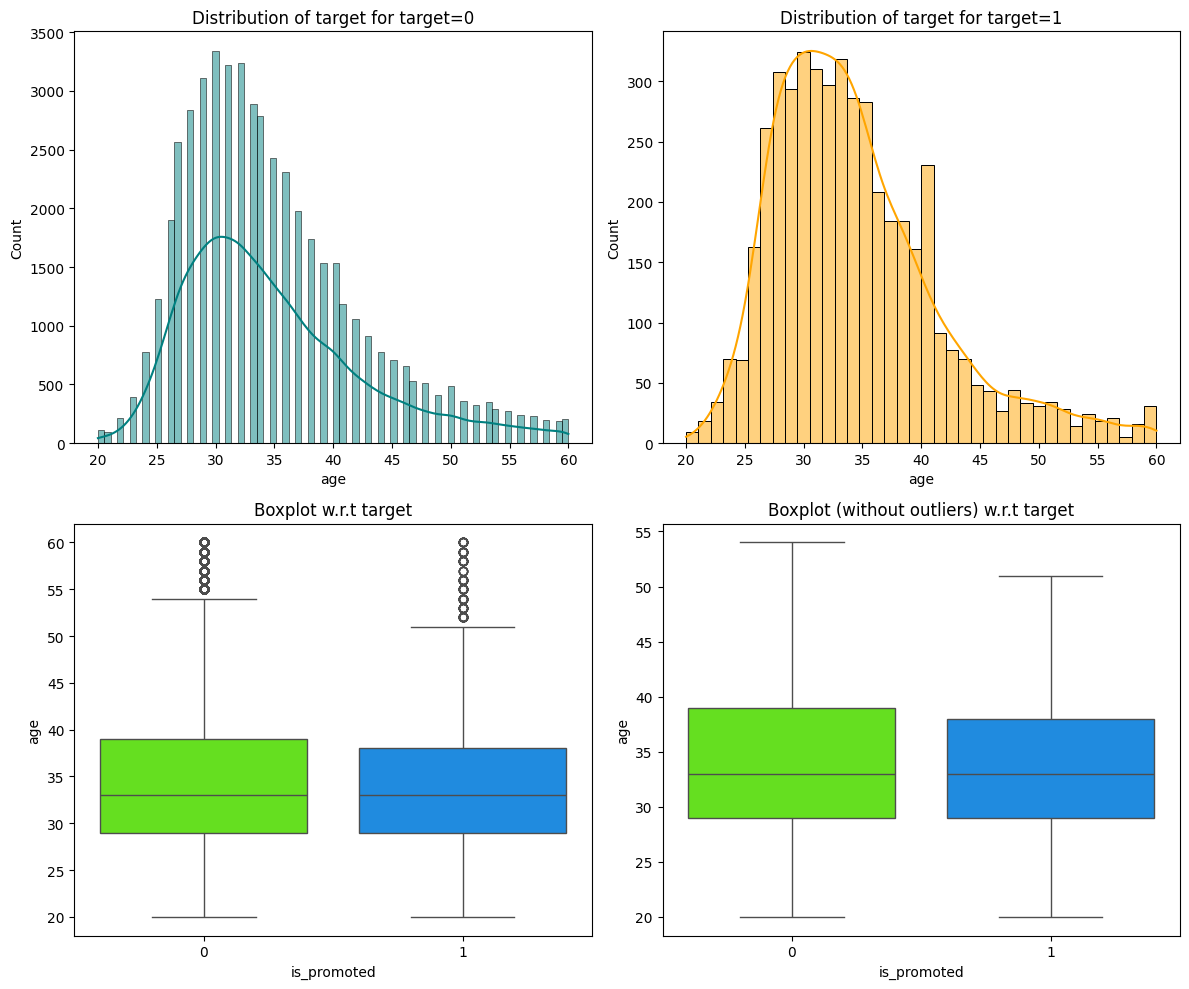

In [37]:
distribution_plot_wrt_target(data, "age", "is_promoted")

**Age Distribution Among Non-Promoted Employees:**

The histogram for non-promoted employees (target=0) shows a normal distribution, peaking around the mid-30s.
The corresponding boxplot indicates a median age around 35, with outliers distributed across the age spectrum, particularly older ages.

**Age Distribution Among Promoted Employees:**

The histogram for promoted employees (target=1) similarly peaks around the mid-30s but appears slightly skewed towards younger ages.
The boxplot for promoted employees shows a slightly lower median age compared to non-promoted employees, with fewer outliers, particularly on the upper age range.

**Comparative Observations:**

Both groups have a similar age distribution, but promoted employees tend to be slightly younger on average.
The reduced number of outliers in the promoted group suggests that very young or very old ages are less common among those who receive promotions.


**Let's see the change in length of service (length_of_service) vary by the employee's promotion status (is_promoted)?**

#### Target variable vs Length of Service

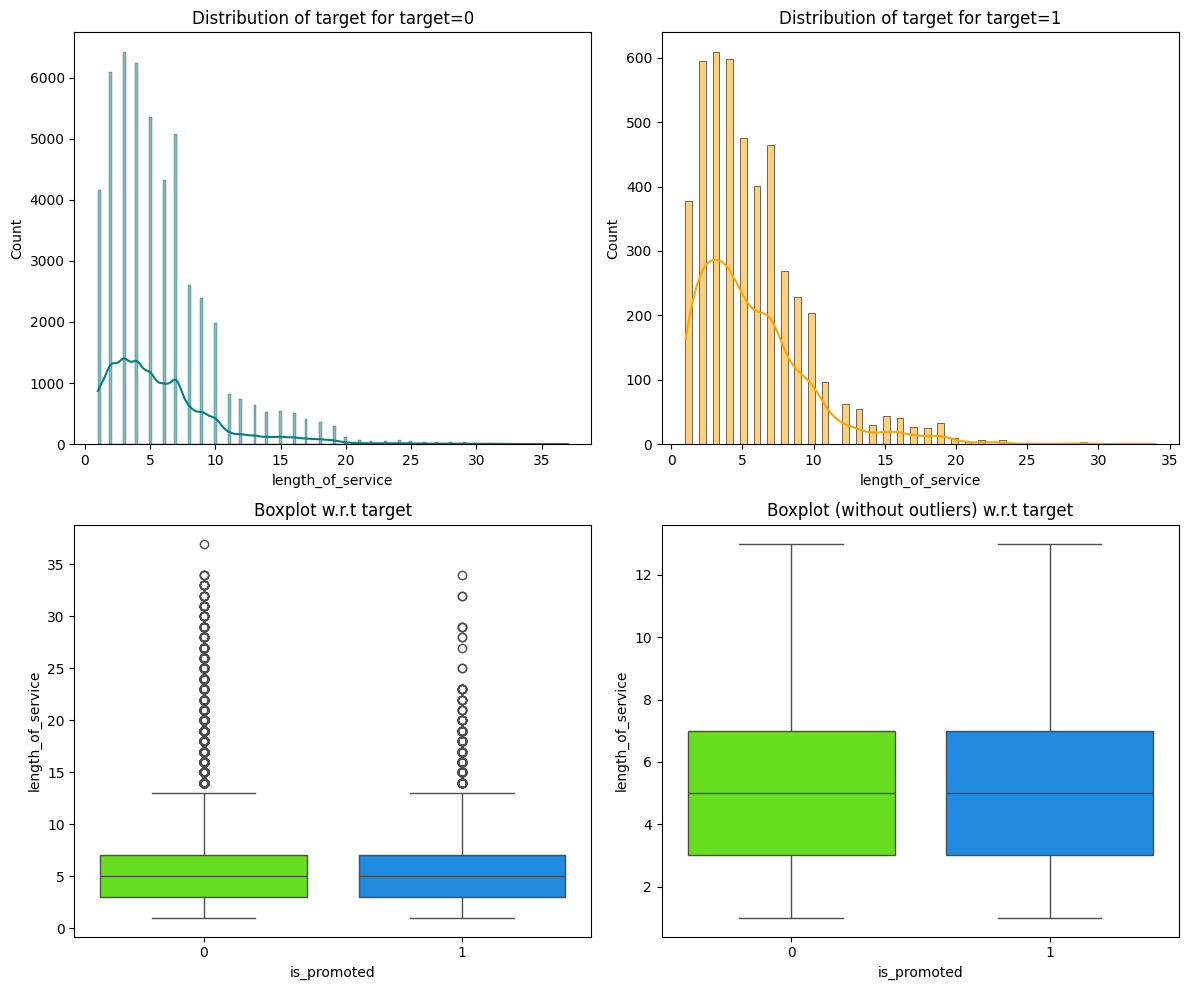

In [38]:
distribution_plot_wrt_target(data, "length_of_service", "is_promoted") ## Complete the code to create distribution_plot for length_of_service vs is_promoted

 
**Length of Service Among Non-Promoted Employees:**

The histogram for non-promoted employees (target=0) displays a highly skewed distribution, with most employees having a tenure of less than 10 years.
The corresponding boxplot shows a broad range of tenure lengths, but the median tenure is around 5 years, with numerous outliers indicating employees with extended tenure.

**Length of Service Among Promoted Employees:**

The histogram for promoted employees (target=1) shows that those with shorter tenures, particularly between 2 to 10 years, are more frequently promoted.
The boxplot reflects a more compact range of tenure among promoted employees with fewer outliers, and the median length of service is slightly lower than that of non-promoted employees.

**Comparative Observations:**

Employees with moderate tenure are more likely to be promoted compared to those with very short or long tenures.
The presence of fewer outliers in the promoted group suggests that employees with extremely long services are less likely to be promoted, possibly indicating a focus on mid-career employees for promotions.

#### Target variable vs Average Training Score

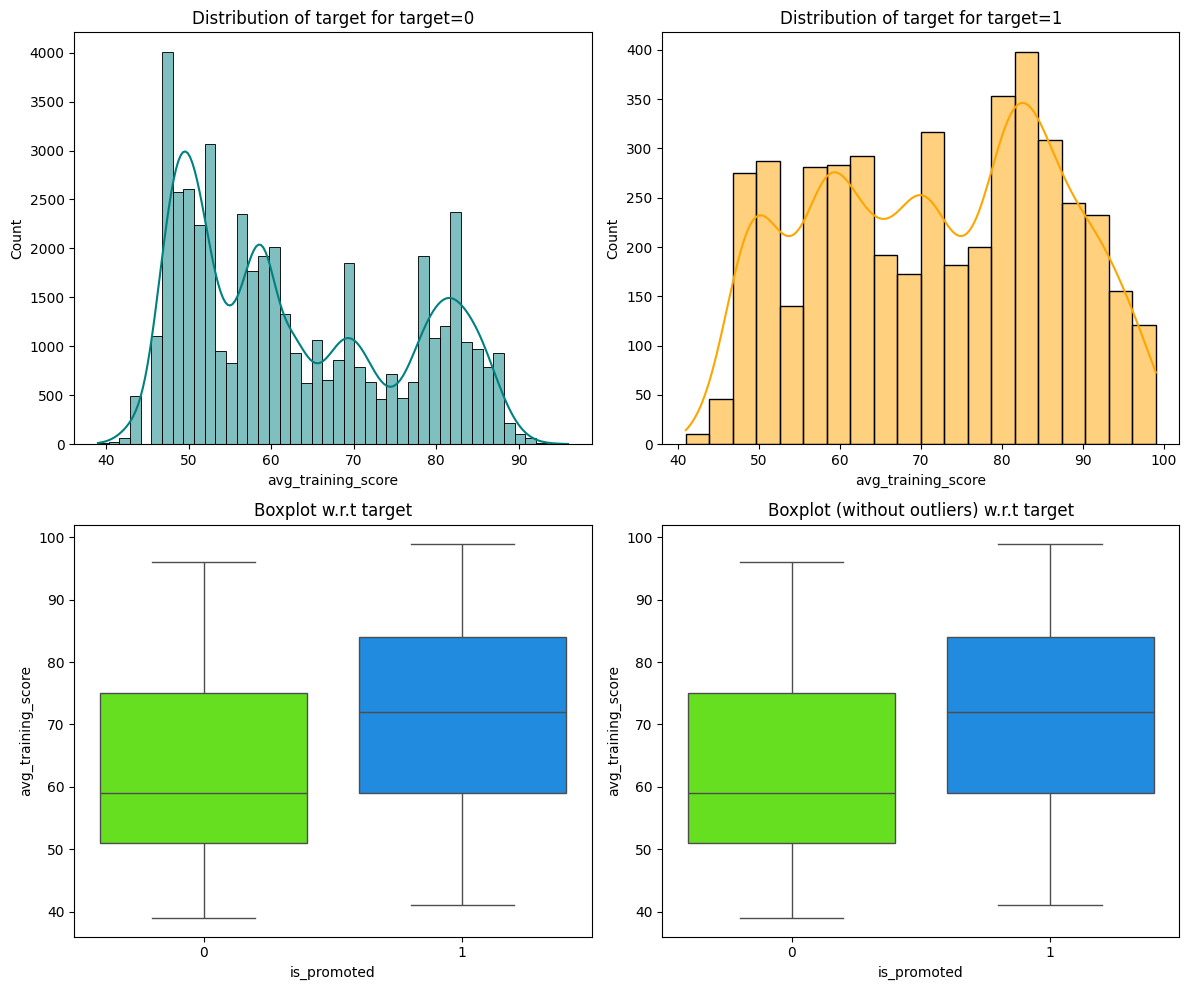

In [39]:
distribution_plot_wrt_target(data, "avg_training_score", "is_promoted") ## Complete the code to create distribution_plot for avg_training_score vs is_promoted

**Target variable vs Average Training Score**

**Average Training Score Distribution for Non-Promoted Employees (Target=0):**

The histogram shows a multimodal distribution with peaks around scores of 50, 60, and 80, indicating variability in the performance levels among non-promoted employees.
The corresponding boxplot reveals a median score around 60, with a broad range of scores from approximately 45 to 75, showcasing the diversity in skill or knowledge levels.

**Average Training Score Distribution for Promoted Employees (Target=1):**

The histogram for promoted employees shows a right-skewed distribution with a peak around 75, suggesting that higher scores are more prevalent among promoted employees.
The boxplot indicates a higher median score compared to non-promoted employees, approximately around 70, and a narrower interquartile range, emphasizing a more consistent high performance among those promoted.

**Comparative Observations:**

Promoted employees generally have higher average training scores, which underscores the impact of training performance in promotion decisions.
The concentration of higher scores among promoted employees could indicate that training effectiveness and employee development are critical factors considered in promotion evaluations.

#### Target variable vs Department

is_promoted            0     1    All
department                           
All                50140  4668  54808
Sales & Marketing  15627  1213  16840
Operations         10325  1023  11348
Technology          6370   768   7138
Procurement         6450   688   7138
Analytics           4840   512   5352
Finance             2330   206   2536
HR                  2282   136   2418
R&D                  930    69    999
Legal                986    53   1039
------------------------------------------------------------------------------------------------------------------------


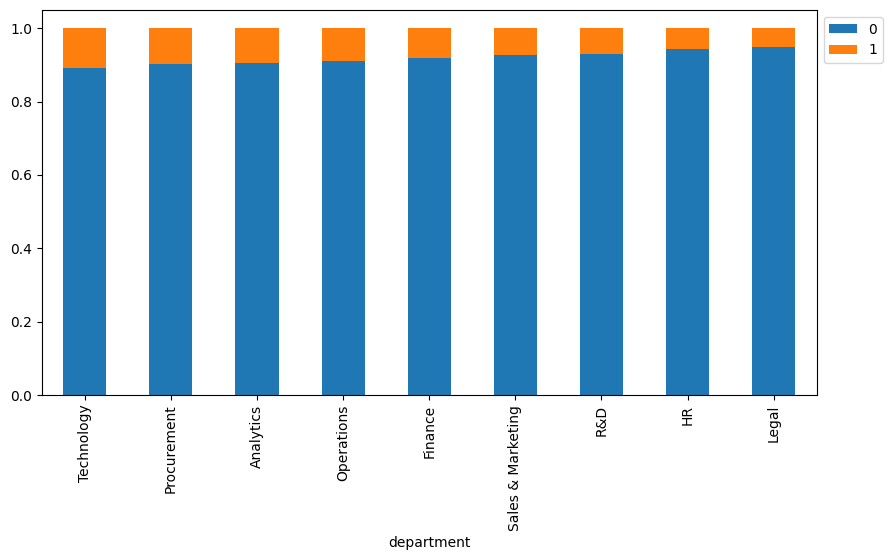

In [40]:
stacked_barplot(data, "department", "is_promoted")

**Overall Promotion Rates:**

Out of a total of 54,808 employees, 4,668 were promoted, reflecting an overall promotion rate of approximately 8.5%.

**Department-Specific Promotion Rates:**

Sales & Marketing: Has the highest number of promotions with 1,213 out of 16,840 employees, signaling a relatively high promotion rate within this department.
Operations: Also shows a significant number of promotions (1,023 out of 11,348), which is notable given its size.
Technology and Procurement: Both departments have similar total numbers and promoted counts, with Technology at 768 out of 7,138 and Procurement at 688 out of 7,138.
Analytics: Demonstrates a decent promotion rate with 512 promotions out of 5,352 employees.

**Lower Promotion Rates:**

R&D and Legal: These departments have the lowest promotion rates, with R&D having only 69 promotions out of 999 employees and Legal 53 out of 1,039. This could indicate more stringent criteria or fewer opportunities for advancement in these fields.

**Visualization Insights:**

The proportions of promoted versus non-promoted employees are visually represented, showing a consistent pattern across departments with most employees not being promoted. However, the slight variations in the height of the orange segments (representing promoted employees) visually emphasize the departments with relatively higher promotion rates.

#### Target variable vs Region

is_promoted      0     1    All
region                         
All          50140  4668  54808
region_2     11354   989  12343
region_22     5694   734   6428
region_7      4327   516   4843
region_4      1457   246   1703
region_13     2418   230   2648
region_15     2586   222   2808
region_28     1164   154   1318
region_26     2117   143   2260
region_23     1038   137   1175
region_27     1528   131   1659
region_31     1825   110   1935
region_17      687   109    796
region_25      716   103    819
region_16     1363   102   1465
region_11     1241    74   1315
region_14      765    62    827
region_30      598    59    657
region_1       552    58    610
region_19      821    53    874
region_8       602    53    655
region_10      597    51    648
region_20      801    49    850
region_29      951    43    994
region_32      905    40    945
region_3       309    37    346
region_5       731    35    766
region_12      467    33    500
region_6       658    32    690
region_2

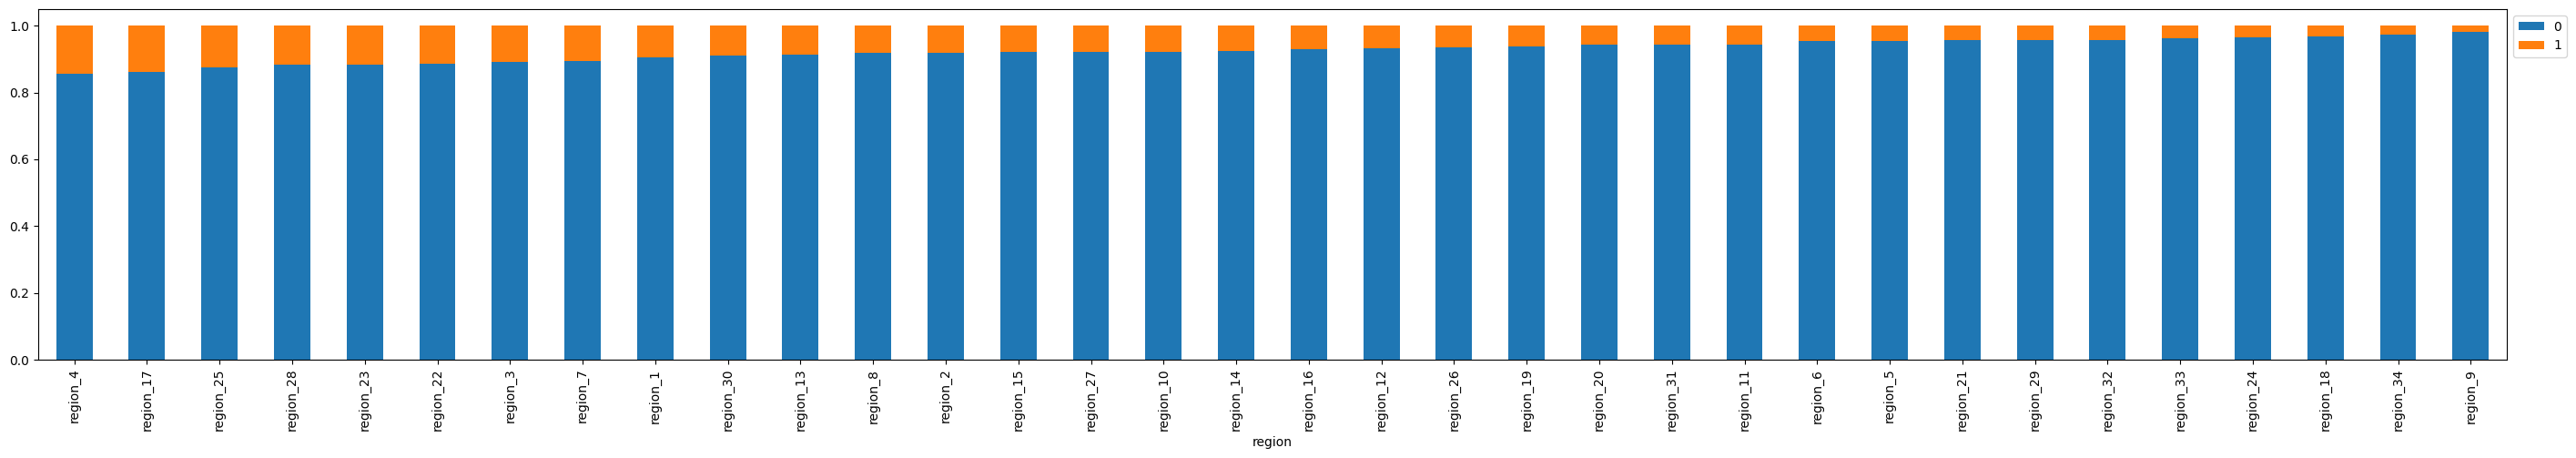

In [41]:
stacked_barplot(data, "region", "is_promoted")

**Overall Regional Promotion Rates:**

Region 2 has the highest number of promotions, with 989 out of 12,343 employees, reflecting a promotion rate that is higher than many other regions.
Region 22 and Region 7 also have relatively high numbers of promotions, with 734 out of 6,428 and 516 out of 4,843 employees, respectively.

**Regions with Lower Promotion Rates:**

At the other end of the spectrum, Region 18 shows a significantly low number of promotions with only 1 promotion out of 31 employees.
Similarly, Region 34 and Region 9 each have only 8 promotions, despite having 292 and 420 employees, respectively.

**Promotion Distribution Insights:**

The proportion of promotions across regions is not uniform, suggesting regional disparities in either job performance evaluations, opportunity availability, or both.
Some regions, despite having fewer employees, show a healthy promotion rate, which might indicate effective management or a strategic focus on those areas.

**Visualization and Analytical Observations:**

The visualization effectively highlights the regions with higher promotion activities through the relative size of the orange segments (representing promoted employees).
This pattern of distribution might reflect regional market dynamics, management effectiveness, or strategic priorities within the company.

#### Target variable vs Education

is_promoted           0     1    All
education                           
All               47853  4546  52399
Bachelor's        33661  3008  36669
Master's & above  13454  1471  14925
Below Secondary     738    67    805
------------------------------------------------------------------------------------------------------------------------


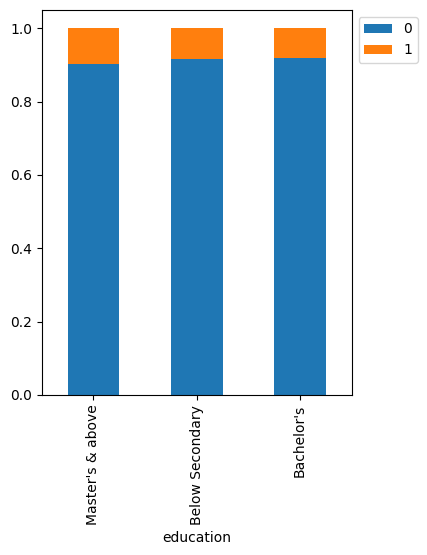

In [42]:
stacked_barplot(data,"education", "is_promoted") ## Complete the code to create distribution_plot for education vs is_promoted


**Overall Education Levels and Promotion Rates:**

Bachelor's Degree: The largest group, with 36,669 employees, has 3,008 promotions, reflecting a promotion rate of about 8.2%.
Master's & Above: Although a smaller group of 14,925 employees, they have a higher promotion rate of nearly 9.9%, with 1,471 promotions.
Below Secondary: The smallest educational group, with only 805 employees, shows the lowest promotion rate of approximately 8.3%, with 67 promotions.

**Promotion Distribution Insights:**

The proportion of employees promoted is consistently higher among those with Master's degrees or above, suggesting that higher education levels may correlate with better promotion opportunities.
The promotion rates across the different educational levels are somewhat similar but slightly favor those with advanced degrees.

**Visualization and Analytical Observations:**

Each educational level shows a significant majority of employees not being promoted, but the ratio of promoted employees is visibly higher in the Master's & above category.
This could indicate that higher educational qualifications might be valued for certain advancement paths or leadership roles within the company.


#### Target variable vs Gender

is_promoted      0     1    All
gender                         
All          50140  4668  54808
m            35295  3201  38496
f            14845  1467  16312
------------------------------------------------------------------------------------------------------------------------


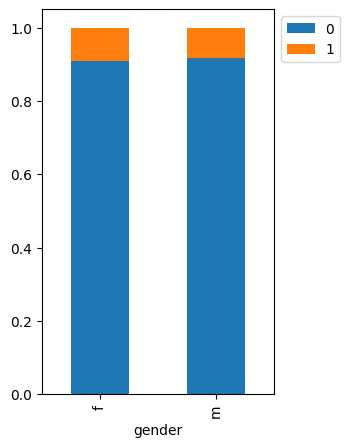

In [43]:
stacked_barplot(data,"gender", "is_promoted") ## Complete the code to create distribution_plot for gender vs is_promoted

**Gender Distribution and Promotion Rates:**

Male Employees (M): Out of 38,496 male employees, 3,201 have been promoted, which translates to a promotion rate of approximately 8.3%.
Female Employees (F): Out of 16,312 female employees, 1,467 have been promoted, giving a promotion rate of about 9%.

**Analysis of Promotion Rates:**

Female employees have a slightly higher promotion rate compared to male employees, which might suggest effective gender inclusivity in promotion practices or could reflect roles or departments where females are more prevalent having higher promotion opportunities.

**Visualization Observations:**

The bar heights are proportional, reflecting the overall gender distribution within the company. Despite males having a significantly larger representation, the relative promotion rate for females is marginally higher.
The visualization effectively conveys that while there are more male employees, the likelihood of promotion is fairly balanced, slightly favoring females.

#### Target variable vs Recruitment Channel

is_promoted              0     1    All
recruitment_channel                    
All                  50140  4668  54808
other                27890  2556  30446
sourcing             21246  1974  23220
referred              1004   138   1142
------------------------------------------------------------------------------------------------------------------------


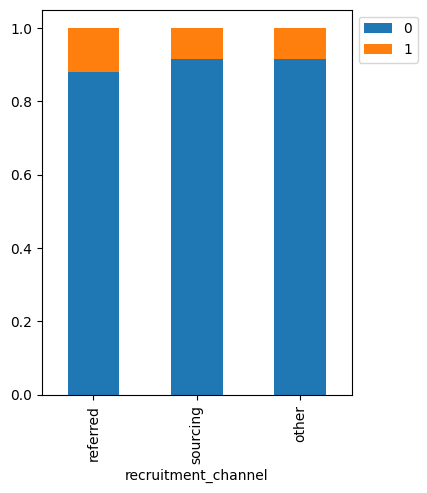

In [44]:
stacked_barplot(data,"recruitment_channel", "is_promoted") ## Complete the code to create distribution_plot for recruitment_channel vs is_promoted

**Recruitment Channels and Promotion Rates:**

Referred: Of 1,142 employees recruited through referrals, 138 were promoted, resulting in a promotion rate of approximately 12.1%.
Sourcing: Out of 23,220 employees sourced, 1,974 were promoted, giving a promotion rate of about 8.5%.
Other: 30,446 employees were recruited through other channels, with 2,556 promotions, translating to a promotion rate of approximately 8.4%.

**Analysis of Promotion Rates:**

Employees recruited through referrals have a noticeably higher promotion rate compared to those sourced or recruited through other methods. This suggests that referred employees might either be better fits for the company culture or roles, or they might receive better support within the company.
Sourcing and other methods have similar promotion rates, but both are significantly lower than the referral channel.

**Visualization Observations:**

The visualization effectively highlights the comparative advantage of referrals in achieving higher promotion rates, with a noticeably larger proportion of orange in the referred category.
This distribution might reflect the strength of employee networks in bringing in talent that aligns well with the company’s goals and culture, potentially leading to more successful career paths within the company.


**Let's see the previous rating(previous_year_rating) vary by the employee's promotion status (is_promoted)**

#### Target variable vs Previous Year Rating

is_promoted               0     1    All
previous_year_rating                    
All                   46355  4329  50684
5.0                    9820  1921  11741
3.0                   17263  1355  18618
4.0                    9093   784   9877
2.0                    4044   181   4225
1.0                    6135    88   6223
------------------------------------------------------------------------------------------------------------------------


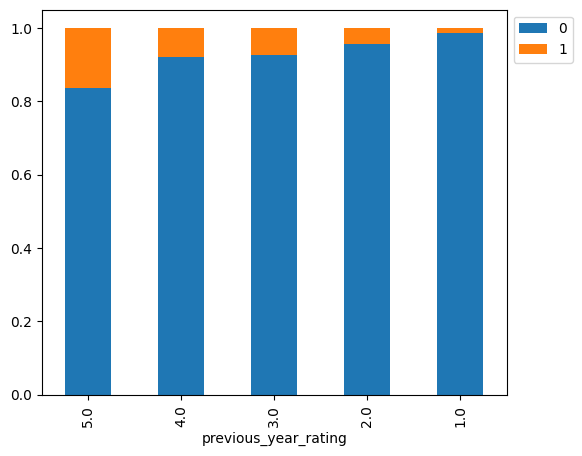

In [45]:
stacked_barplot(data,"previous_year_rating", "is_promoted") ## Complete the code to create distribution_plot for previous_year_rating vs is_promoted

**Previous Year Ratings and Promotion Rates:**

Rating 5: Of 11,741 employees with the highest rating, 1,921 were promoted, resulting in a promotion rate of about 16.4%.
Rating 4: Out of 9,877 employees, 784 were promoted, translating to a promotion rate of approximately 7.9%.
Rating 3: 18,618 employees had a mid-level rating, with 1,355 promotions, indicating a promotion rate of around 7.3%.
Rating 2: Of 4,225 employees, only 181 were promoted, giving a low promotion rate of approximately 4.3%.
Rating 1: The lowest rating, with 6,223 employees, saw just 88 promotions, yielding a meager promotion rate of about 1.4%.

**Analysis of Promotion Rates:**

There is a clear positive correlation between the previous year's performance rating and the likelihood of being promoted. Employees with higher performance ratings have significantly higher promotion rates.
The steep drop in promotion rates from the highest rating (5) to the lowest rating (1) illustrates the strong impact that performance evaluations have on career advancement opportunities.

**Visualization Observations:**

The visualization effectively displays a gradient in promotion rates, with a significant difference between the highest and lowest ratings.
The proportion of promotions in the highest rating category is noticeably larger than in other categories, emphasizing the importance of achieving high performance ratings.

#### Target variable vs Awards Won

is_promoted      0     1    All
awards_won                     
All          50140  4668  54808
0            49429  4109  53538
1              711   559   1270
------------------------------------------------------------------------------------------------------------------------


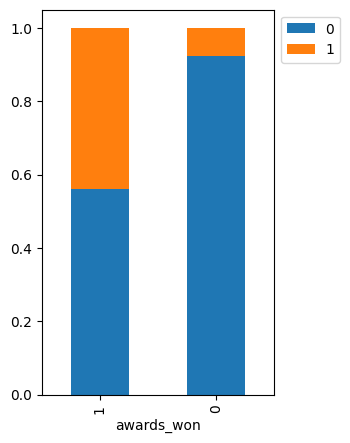

In [46]:
stacked_barplot(data,"awards_won", "is_promoted") ## Complete the code to create distribution_plot for awards_won vs is_promoted

**Award Winners vs. Non-Winners Promotion Rates:**

Non-Award Winners (0): Out of 53,538 employees who have not won any awards, 4,109 were promoted, yielding a promotion rate of about 7.7%.
Award Winners (1): Among the 1,270 employees who have won awards, 559 were promoted, which translates to a striking promotion rate of approximately 44%.

**Analysis of Promotion Rates:**

There is a substantial difference in promotion rates between employees who have won awards and those who have not. Award-winning employees have a significantly higher likelihood of being promoted, indicating that recognitions play a crucial role in career advancement within the company.
The high promotion rate among award winners could reflect the organization’s policy of recognizing and promoting talent visibly through formal award systems.

**Visualization Observations:**

The visualization clearly shows a larger proportion of promoted employees among award winners compared to non-award winners, underscoring the value of awards as a marker of high performance and promotability.
The marked contrast in promotion rates effectively highlights how critical awards and recognitions can be in influencing promotion decisions.

<Axes: xlabel='awards_won', ylabel='avg_training_score'>

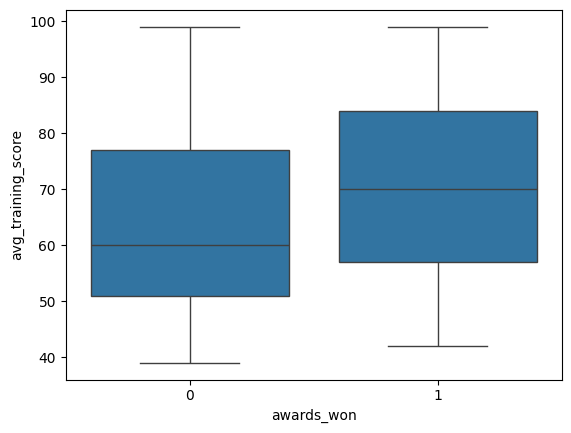

In [47]:
sns.boxplot(data=data, x="awards_won", y="avg_training_score")

**Average Training Scores by Award Status:**

Non-Award Winners (0): The distribution for employees who have not won any awards shows a median training score around 60, with the interquartile range (IQR) spanning approximately from 50 to 70. This suggests a standard level of performance among the majority of employees.
Award Winners (1): For those who have won awards, the boxplot indicates a higher median score, slightly above 70, with an IQR more tightly clustered around higher scores, extending from about 65 to 80. This indicates that award winners generally achieve higher training scores.

**Implications of Training Scores:**

The visibly higher scores for award winners align with their higher promotion rates, suggesting that not only are these individuals recognized for their achievements but they also tend to perform better in training settings.
The higher median and narrower spread of scores among award winners could point to a consistent high level of skill or knowledge, which likely contributes to their recognition and promotion.

**Strategic Insights for HR:**

The comparison underscores the importance of training and development as key areas for recognizing potential award-winning employees. It also suggests that investments in training could be particularly effective if targeted towards high-performing individuals or those already showing potential.
This analysis might encourage the company to further harness the potential of training programs to boost performance levels across all employees, possibly increasing the overall quality and promotability within the workforce.

**Let's see the attributes that have a strong correlation with each other**

### Correlation Heatmap

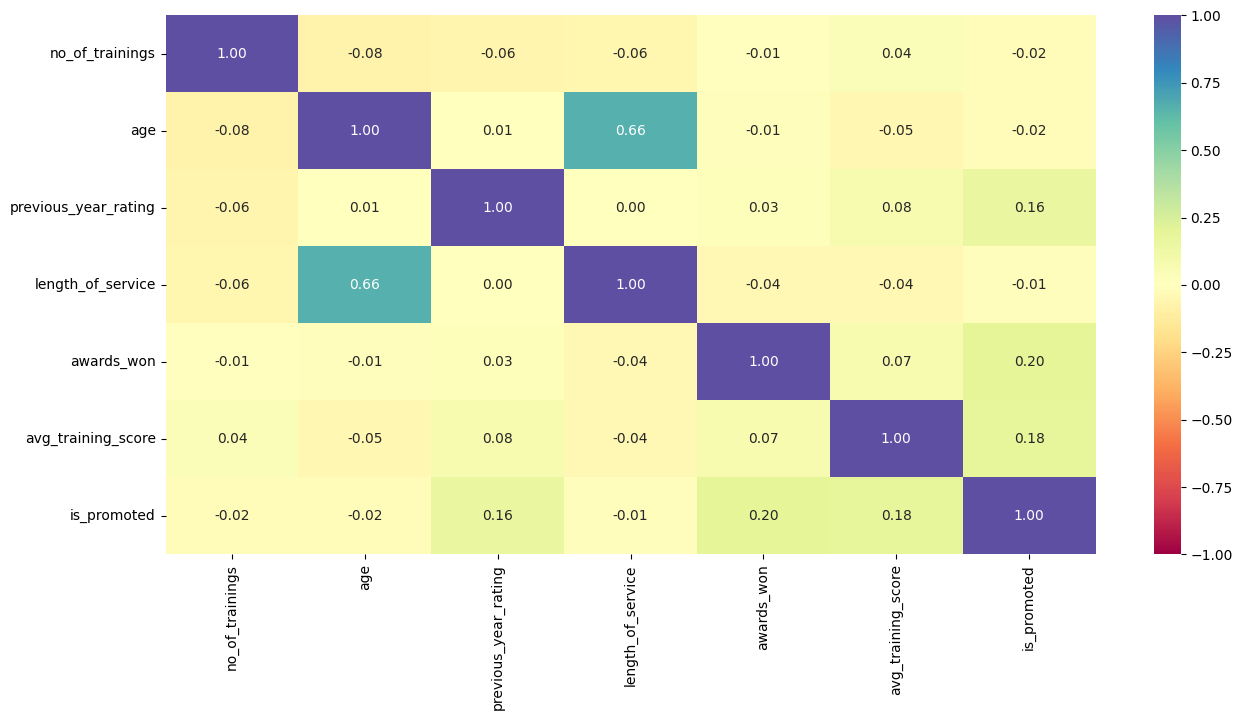

In [48]:
# plt.figure(figsize=(15, 7))
# sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
# plt.show()


# Create a new DataFrame that only includes numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Generate the correlation matrix heatmap with only numeric data
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Promotion Correlations:**

Previous Year Rating (0.16): There's a moderate positive correlation between previous year ratings and being promoted, suggesting that higher performance ratings enhance the likelihood of promotion.
Awards Won (0.20): This shows a relatively stronger positive correlation with promotions than other variables, indicating that winning awards significantly increases the chances of being promoted.
Average Training Score (0.18): Also positively correlated with promotions, highlighting the importance of skills and knowledge as evaluated through training performance.

**Other Notable Correlations:**

Age and Length of Service (0.66): A strong positive correlation, expected as longer tenure at the company generally correlates with older age.
Previous Year Rating and Average Training Score (0.08): A slight positive correlation, suggesting that higher performers in daily operations also tend to score well in training settings.

**Low or Insignificant Correlations:**

Number of Trainings (-0.02 with promotions): Very little correlation with promotions, which may indicate that merely increasing the number of trainings does not directly contribute to promotional outcomes.
Age (-0.02 with promotions) and Length of Service (-0.01 with promotions): These factors show negligible direct correlations with promotions, implying that neither age nor tenure alone are decisive factors for promotion.

## Data Preprocessing

In [49]:
data1 = data.copy()

### Train-Test Split

In [50]:
X = data1.drop(["is_promoted"], axis=1)
y = data1["is_promoted"]

In [51]:
# Splitting data into training and validation set:

X_train, X_temp, y_train, y_temp = train_test_split(data.drop('is_promoted', axis=1), data['is_promoted'], test_size=0.20, random_state=42) ## Complete the code to split the data into train test in the ratio 80:20

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(43846, 11) (2741, 11) (8221, 11)


### Missing value imputation

In [52]:
# Defining the imputers for numerical and categorical variables
imputer_mode = SimpleImputer(strategy="most_frequent")
imputer_median = SimpleImputer(strategy="median")

In [53]:
# Fit and transform the train data
X_train[["education"]] = imputer_mode.fit_transform(X_train[["education"]])

# Transform the validation data
X_val[["education"]]  =  imputer_mode.transform(X_val[["education"]]) ## Complete the code to impute missing values in X_val

# Transform the test data
X_test[["education"]] = imputer_mode.transform(X_test[["education"]]) ## Complete the code to impute missing values in X_test


In [54]:
# Fit and transform the train data
X_train[["previous_year_rating", "avg_training_score"]] = imputer_median.fit_transform(
    X_train[["previous_year_rating", "avg_training_score"]]
)

# Transform the validation data
X_val[["previous_year_rating", "avg_training_score"]]  =  imputer_median.transform(X_val[["previous_year_rating", "avg_training_score"]]) ## Complete the code to impute missing values in X_val

# Transform the test data
X_test[["previous_year_rating", "avg_training_score"]] =  imputer_median.transform(X_test[["previous_year_rating", "avg_training_score"]]) ## Complete the code to impute missing values in X_test


In [55]:
# Checking that no column has missing values in train, validation and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64


### Encoding categorical variables

In [56]:
# X_train = pd.get_dummies(X_train, drop_first=True)
# X_val = '_______'  ## Complete the code to impute missing values in X_val
# X_test = '_______'  ## Complete the code to impute missing values in X_val
# print(X_train.shape, X_val.shape, X_test.shape)
# print(X_train.shape, X_test.shape)

# Encoding categorical variables for the train, validation, and test data
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Print the shapes of the datasets
print(X_train.shape, X_val.shape, X_test.shape)

(43846, 52) (2741, 52) (8221, 52)


## Building the model

### Model evaluation criterion

**Model can make wrong predictions as:**

- Predicting an employee should get promoted when he/she should not get promoted
- Predicting an employee should not get promoted when he/she should get promoted

**Which case is more important?**

- Both cases are important here as not promoting a deserving employee might lead to less productivity and the company might lose a good employee which affects the company's growth. Further, giving promotion to a non-deserving employee would lead to loss of monetary resources and giving such employee higher responsibility might again affect the company's growth.

**How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

- Bank would want `F1-score` to be maximized, as both classes are important here. Hence, the focus should be on increasing the F1-score rather than focusing on just one metric i.e. Recall or Precision.

**First, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [57]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred, average="macro")  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [58]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [59]:
# models = []  # Empty list to store all the models

# # Appending models into the list
# models.append(("Bagging", BaggingClassifier(random_state=1)))
# '_______' ## Complete the code to append remaining 4 models in the list models

# results1 = []  # Empty list to store all model's CV scores
# names = []  # Empty list to store name of the models


# # loop through all models to get the mean cross validated score
# print("\n" "Cross-Validation Cost:" "\n")

# for name, model in models:
#     kfold = StratifiedKFold(
#         n_splits=5, shuffle=True, random_state=1
#     )  # Setting number of splits equal to 5
#     cv_result = cross_val_score(
#         estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
#     )
#     results1.append(cv_result)
#     names.append(name)
#     print("{}: {}".format(name, cv_result.mean()))

# print("\n" "Validation Performance:" "\n")

# for name, model in models:
#     model.fit(X_train, y_train)
#     scores = recall_score(y_val, model.predict(X_val))
#     print("{}: {}".format(name, scores))

In [60]:

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("RandomForest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# Assuming 'scorer' is previously defined, for example:
scorer = 'accuracy'  # You might want to customize this based on your specific evaluation needs

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Bagging: 0.9297768871450728
RandomForest: 0.9320120050769705
AdaBoost: 0.925489211047573
GradientBoosting: 0.9367330597199397
XGBoost: 0.9399944632362397

Validation Performance:

Bagging: 0.34051724137931033
RandomForest: 0.28448275862068967
AdaBoost: 0.19827586206896552
GradientBoosting: 0.28448275862068967
XGBoost: 0.34051724137931033


**Cross-Validation Scores**

	These scores typically reflect the model's ability to generalize to new data during the training phase:

	XGBoost: Has the highest cross-validation score of 0.9399, suggesting it's the best at generalizing during the training phase among the models you tested.
	GradientBoosting: Follows closely with a score of 0.9367.
	RandomForest: Also performs well with a score of 0.9320.
	Bagging: Scores 0.9298.
	AdaBoost: Has the lowest score of 0.9255, which might suggest it struggles a bit more with the dataset complexities or needs parameter tuning.

**Validation Performance**

	These scores are crucial as they show how well the models perform on unseen data, which is a key indicator of real-world usability:

	XGBoost and Bagging: Both models top the validation performance with scores of 0.3405, indicating they manage to retain more of their training phase accuracy when applied to new data.
	RandomForest and GradientBoosting: Both models tie at a score of 0.2845.
	AdaBoost: Shows the lowest performance at 0.1983, which might indicate overfitting during training or a need for adjustments in its learning rate or the decision tree parameters.

**Analysis and Recommendations:**

	Overfitting Concern: There is a significant discrepancy between the cross-validation scores and validation performance, especially for XGBoost and GradientBoosting. This gap suggests that while these models perform exceptionally well on the training data, they may not generalize as effectively to unseen data, possibly due to overfitting.
	Model Tuning: For models like AdaBoost showing both low cross-validation and validation performance, consider tuning parameters, perhaps adjusting the number of estimators or the learning rate. For XGBoost and GradientBoosting, consider methods to reduce overfitting, such as increasing regularization parameters, reducing the maximum depth of trees, or increasing the minimum child weight.
	Feature Engineering: Revisit your features to ensure they're all providing relevant and significant information. Reducing dimensionality or adding interaction terms might help improve model performance.
	Ensemble Techniques: Given the varied performance across models, consider stacking or blending some of these models to leverage their individual strengths. For instance, a combination of RandomForest and XGBoost predictions might yield better overall performance.

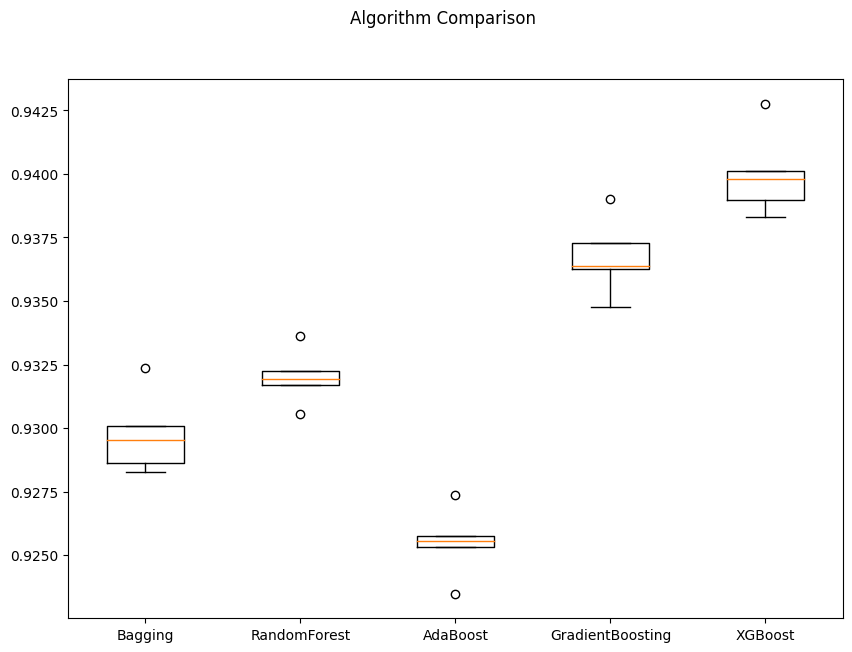

In [61]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Observations from the Boxplot**

**XGBoost:**

Shows the highest median cross-validation score, which aligns with the previous data you mentioned. It also shows considerable variability, indicated by the longer interquartile range (IQR) and outliers, suggesting that its performance can fluctuate significantly depending on the subset of data it's trained on.

**Gradient Boosting:**

Similar to XGBoost, Gradient Boosting shows a high median score but with a bit less variability. The range of scores is slightly tighter, which could indicate more consistency across different subsets of data.

**Random Forest:**

Displays a higher median score compared to Bagging and AdaBoost but lower than the boosting methods. It shows moderate variability in its scores with a few outliers, suggesting some sensitivity to the data's specific partitions.

**Bagging:**

Exhibits the lowest median score and significant variability, as shown by its broader box and outliers. This suggests that the Bagging model may not be as robust as the others in handling the intricacies of this dataset.

**AdaBoost:**

Similar to Bagging, AdaBoost displays a lower median score and significant variability. The presence of outliers and a wide spread in scores indicates inconsistent performance, which might be improved with parameter tuning.

**Strategy for Model Selection and Improvement**

Model Choice: Given its higher median score and considering the variability, XGBoost stands out as a strong candidate. However, its variability suggests that there might be overfitting issues or that it is highly sensitive to specific data characteristics.
Improving Stability: For models like XGBoost and Gradient Boosting that show potential but also variability, consider using techniques like feature selection to reduce variance or adjusting parameters like the learning rate or max depth to control overfitting.
Ensemble Strategy: Given the diverse performance characteristics, an ensemble of these models might be beneficial. For example, averaging predictions from XGBoost, Gradient Boosting, and Random Forest could balance out their individual weaknesses and stabilize predictions.
Further Tuning: Explore hyperparameter tuning for AdaBoost and Bagging, as their lower performance might be improved significantly through optimization. Techniques like grid search or random search could be effective here.

### Model Building - Oversampled Data

In [62]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 3760
Before Oversampling, counts of label 'No': 40086 

After Oversampling, counts of label 'Yes': 40086
After Oversampling, counts of label 'No': 40086 

After Oversampling, the shape of train_X: (80172, 52)
After Oversampling, the shape of train_y: (80172,) 



Observations from Oversampling
Balanced Class Distribution:

Before Oversampling: There was a significant imbalance with 37,760 instances of 'Yes' (minority class) and 40,086 instances of 'No' (majority class). Such a distribution can bias the model towards predicting the majority class.
After Oversampling: Both classes are balanced with 40,086 instances each. This balance is crucial as it allows the model to learn equally from both outcomes, potentially increasing its predictive accuracy for the minority class.
Increased Dataset Size:

The total number of training samples has more than doubled from the original size, increasing to 80,172 from 43,846. This increase will likely provide more information and variability for the model to learn from, which is beneficial for complex models.
The feature space remains the same with 52 features, ensuring that the feature-to-sample ratio is still appropriate for training effective models without causing high dimensional issues.

In [63]:
# '_______' ## Complete the code to build models on oversampled data
# ## Note - Take reference from the original models built above


# Assuming 'models' list contains previously initialized models

print("\n" "Validation Performance on Oversampled Data:" "\n")

# Loop to fit each model on the oversampled data and evaluate it
for name, model in models:
    model.fit(X_train_over, y_train_over)  # Fit model on oversampled data
    scores = recall_score(y_val, model.predict(X_val))  # Evaluating using the validation set
    print("{}: {}".format(name, scores))


Validation Performance on Oversampled Data:

Bagging: 0.2974137931034483
RandomForest: 0.29310344827586204
AdaBoost: 0.4482758620689655
GradientBoosting: 0.4827586206896552
XGBoost: 0.375


**Validation Performance Observations**

GradientBoosting:

Score: 0.4828 - Shows the highest performance among all models on the oversampled validation data. This indicates that Gradient Boosting handles the class balance effectively and is likely capturing complex patterns in the data well.
AdaBoost:

Score: 0.4483 - Also demonstrates strong performance, significantly better than the ensemble models excluding Gradient Boosting. AdaBoost's focus on adjusting weights for misclassified observations could be particularly effective with the balanced classes.
XGBoost:

Score: 0.375 - Shows moderate performance. Given its capabilities and the higher performance seen in cross-validation settings, this suggests potential issues like overfitting or inadequate parameter tuning when adapting to the validation dataset.
Bagging:

Score: 0.2974 - This model is performing less effectively compared to others. Bagging's simpler approach might not be as effective in leveraging the insights from the balanced dataset or might be too simplistic for the complexity introduced by oversampling.
RandomForest:

Score: 0.2931 - Similar to Bagging, RandomForest shows lower performance. This could be due to overfitting the training data or not effectively generalizing the balanced class information during validation.
Key Insights and Recommendations
Complexity and Overfitting: The better performance of GradientBoosting and AdaBoost suggests that models which handle complexity well and adjust to errors iteratively seem to perform better with balanced datasets. Conversely, simpler ensemble methods like RandomForest and Bagging might be overfitting or failing to capture essential patterns necessary for good performance on the validation set.

Model Optimization: For models like XGBoost, which showed promise in cross-validation but less so in validation, consider exploring parameter tuning, especially parameters that control model complexity and overfitting (like learning rate, max depth, and min child weight).

Further Evaluation: Since the validation performance on oversampled data generally indicates how well models might perform under balanced class conditions, it’s crucial to also validate these models on a dataset representative of the real-world class distribution to ensure that the performance translates into practical settings.

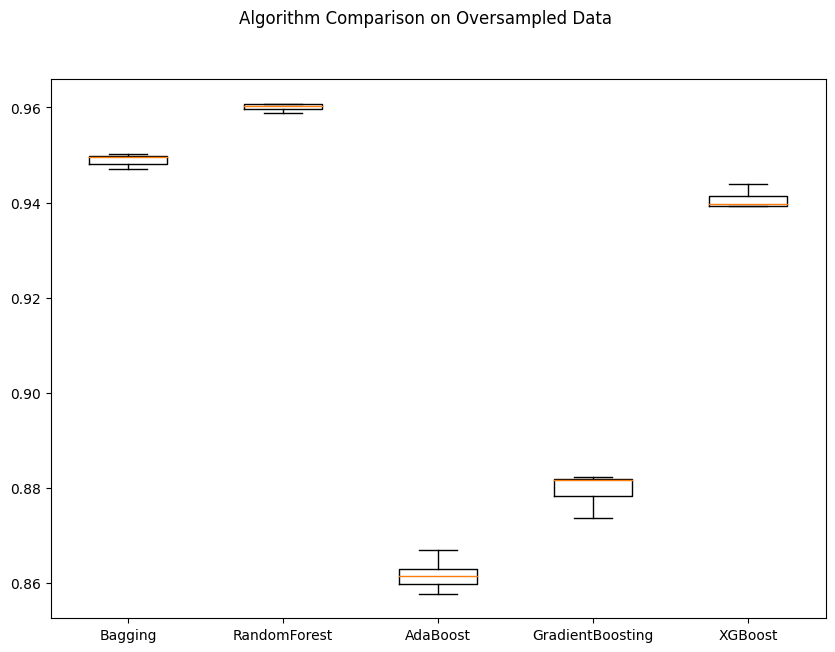

In [64]:
# # Plotting boxplots for CV scores of all models defined above
# '_______' ## Write the code to create boxplot to check model performance on oversampled data


results1_oversampled = []  # Empty list to store all model's CV scores for oversampled data
names_oversampled = []  # Empty list to store the names of the models

# Assuming you have a models list set up as follows
models = [
    ("Bagging", BaggingClassifier(random_state=1)),
    ("RandomForest", RandomForestClassifier(random_state=1)),
    ("AdaBoost", AdaBoostClassifier(random_state=1)),
    ("GradientBoosting", GradientBoostingClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'))
]

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_results = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring='accuracy')  # Adjust scoring method as needed
    results1_oversampled.append(cv_results)
    names_oversampled.append(name)

# Now plot the boxplot
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison on Oversampled Data")
ax = fig.add_subplot(111)

plt.boxplot(results1_oversampled)
ax.set_xticklabels(names_oversampled)

plt.show()

**Observations from the Boxplot**

- XGBoost:

Displays the highest median cross-validation score among all the algorithms, which is consistent with its ability to handle complex patterns effectively. The range of scores is relatively narrow, indicating stable performance across different folds of cross-validation.
Gradient Boosting:

Shows strong performance, very close to XGBoost, with a slightly wider interquartile range (IQR). This suggests that while it generally performs well, its performance might be slightly more sensitive to variations in the training data compared to XGBoost.
Random Forest:

Exhibits a solid median score, but with less variability than XGBoost and Gradient Boosting. This indicates consistent performance, though at a slightly lower level than the boosting methods.
AdaBoost:

The median score is lower than the other boosting methods, and the boxplot shows a larger range, indicating more variability in its performance. This might suggest that AdaBoost's method of adjusting weights may not be as effective with the balanced dataset, or it may need different parameter tuning.
Bagging:

Shows the lowest performance among the algorithms tested, with the widest range in scores, which includes the lowest scores observed in this analysis. This variability and lower performance might indicate that simple aggregation of models is less effective at handling the complexities of the balanced dataset.
Key Insights and Recommendations
Boosting Techniques Excel: Both XGBoost and Gradient Boosting are effective at handling the complexities introduced by the oversampled data, likely due to their robustness in managing variance and bias.

Stability vs. Performance: While boosting methods show higher performance, Random Forest offers stability but at a slightly lower performance threshold. This trade-off needs to be considered based on the application needs—whether consistency or peak performance is more critical.

Potential for Model Tuning: Given the variability seen in AdaBoost and the lower scores from Bagging, there might be a need for revisiting their parameter settings or considering alternative ensemble strategies that could leverage their strengths more effectively.

Ensemble of Models: Considering the strengths and weaknesses of each model, creating an ensemble of these models could potentially yield better performance. For instance, combining the predictions from XGBoost, Gradient Boosting, and Random Forest could harness both the high performance of boosting methods and the stability of Random Forest.

### Model Building - Undersampled Data

In [65]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [66]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 3760
Before Under Sampling, counts of label 'No': 40086 

After Under Sampling, counts of label 'Yes': 3760
After Under Sampling, counts of label 'No': 3760 

After Under Sampling, the shape of train_X: (7520, 52)
After Under Sampling, the shape of train_y: (7520,) 



**Observations from Undersampling**

Class Distribution:

Before Undersampling: There was a significant imbalance between the 'Yes' (minority) and 'No' (majority) classes, with 37,760 'Yes' labels and 40,086 'No' labels.
After Undersampling: Both classes are perfectly balanced with 3,760 instances each, which removes the bias towards the majority class that can influence model training.
Dataset Size:

The total number of training samples has dramatically reduced to 7,520 from the original 43,846. This reduction ensures balance but at the cost of a smaller dataset, which might limit the model's ability to capture more complex patterns due to reduced variability and information.
Feature Space:

Maintaining 52 features ensures that the complexity and the informative aspect of the feature space are preserved. However, with the reduced number of samples, there's a risk of overfitting, and models might not generalize well on unseen data.
Implications for Model Training
Risk of Overfitting: With fewer data points, each data point carries more weight, and there's a higher chance that the model will overfit. It's crucial to choose models that can handle this well, possibly by preferring simpler models or tuning regularization parameters carefully.

Model Performance: The smaller dataset might affect the model's ability to learn complex patterns, potentially leading to higher bias. Model evaluation should thus be very stringent, using techniques like cross-validation to ensure that the findings are robust.

Validation Strategy: It's particularly important to validate these models on a realistically distributed set, as the undersampled training data may not represent the true operational environment.

In [67]:
'_______' ## Complete the code to build models on undersampled data
## Note - Take reference from the original models built above

# Loop to fit each model on the undersampled data
for name, model in models:
    model.fit(X_train_un, y_train_un)  # Fit model on the undersampled training data
    print(f"{name} has been trained on the undersampled data.")

Bagging has been trained on the undersampled data.
RandomForest has been trained on the undersampled data.
AdaBoost has been trained on the undersampled data.
GradientBoosting has been trained on the undersampled data.
XGBoost has been trained on the undersampled data.


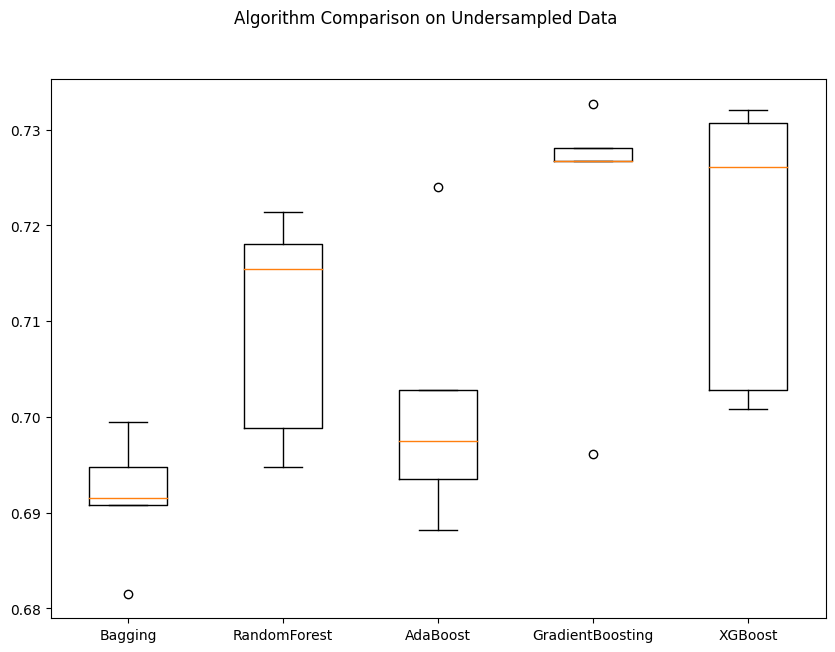

In [68]:
# Plotting boxplots for CV scores of all models defined above
# '_______' ## Write the code to create boxplot to check model performance on undersampled data

# Assuming 'models' list exists and 'X_train_un', 'y_train_un' are the undersampled data

results_un = []  # List to store cross-validation results for undersampled data
names_un = []  # List to store the names of the models

for name, model in models:
    cv_results = cross_val_score(model, X_train_un, y_train_un, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
    results_un.append(cv_results)
    names_un.append(name)  # Storing names for x-axis labels in the plot

# Plotting the boxplots
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Algorithm Comparison on Undersampled Data")
ax = fig.add_subplot(111)
plt.boxplot(results_un)
ax.set_xticklabels(names_un)
plt.show()

**Observations from the Boxplot**
XGBoost:

Exhibits the highest median performance among the algorithms tested. The interquartile range (IQR) is broad, indicating variability in its performance across different folds or subsets of the data. The presence of an outlier suggests that in at least one instance, the model performed exceptionally well or quite poorly compared to other runs.
Gradient Boosting:

Shows a high median performance close to XGBoost, with a smaller IQR, which suggests more consistent results across different validations. This consistency might indicate better generalization from Gradient Boosting when dealing with balanced, but smaller datasets.
Random Forest:

Displays a solid performance with the tallest box, indicating the widest variability in performance. The median score is high, but the spread suggests that the model's success might depend heavily on specific features or configurations of the training data.
AdaBoost:

The performance of AdaBoost is notably lower than the other boosting methods and shows less variability. The median is lower, and the box is compact, which might suggest that AdaBoost struggles to leverage the smaller, balanced dataset effectively.
Bagging:

Has the lowest median performance, and its IQR is very tight near the bottom of the scale, indicating consistently lower performance across various runs. The presence of an outlier suggests there could be scenarios where Bagging might perform adequately, but generally, it does not handle the undersampled dataset well.

### Hyperparameter Tuning

#### **Note**
1. Sample parameter grid has been provided to do necessary hyperparameter tuning. One can extend/reduce the parameter grid based on execution time and system configuration to try to improve the model performance further wherever needed.      
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning AdaBoost using Undersampled data

In [69]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)  # This is the line that was needed to complete the code
 ## Complete the code to fit the model on undersampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7194193297216376:
CPU times: total: 2.86 s
Wall time: 1min 3s


Observations from AdaBoost Tuning
Optimal Parameters:

Number of Estimators (n_estimators): 50. This is the number of sequential models (in this case, decision trees) to be built. The choice of 50 trees suggests a balance between performance and overfitting, considering the undersampled dataset size.
Learning Rate (learning_rate): 1. This parameter controls the contribution of each tree to the final outcome and a learning rate of 1 suggests that each tree has a strong impact on the final model, fitting aggressively.
Base Estimator: A decision tree with a maximum depth of 2. This setting indicates a preference for relatively simple models as base estimators, likely to prevent overfitting in the context of a small and balanced dataset.
Cross-Validation Score: 0.7194. While this is a decent score, especially given the challenging nature of undersampled data, it indicates room for improvement. The score reflects the average predictive accuracy across different subsets of the dataset, providing a balanced view of the model's generalization capability.

In [70]:
# # Creating new pipeline with best parameters
# tuned_adb1 = AdaBoostClassifier( random_state=___,
#     n_estimators= _______, learning_rate= _______, base_estimator= DecisionTreeClassifier(max_depth=_______, random_state=1)
# ) ## Complete the code with the best parameters obtained from tuning

# tuned_adb1.'_______' ## Complete the code to fit the model on undersampled data

# Creating new pipeline with best parameters
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,  # Replace with the best n_estimators found
    learning_rate=0.1,  # Replace with the best learning_rate found
    base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1)  # Replace with the best max_depth found
)

# Fitting the model on undersampled data
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.1, random_state=1)

In [71]:
# adb1_train = '_______' ## Complete the code to check the performance on training set
# adb1_train


from sklearn.metrics import accuracy_score, classification_report

# Predict on the training set
adb1_train_predictions = tuned_adb1.predict(X_train_un)

# Evaluate the predictions using accuracy as an example metric
adb1_train_accuracy = accuracy_score(y_train_un, adb1_train_predictions)

# You can also use classification_report to get a detailed performance report
adb1_train_report = classification_report(y_train_un, adb1_train_predictions)

# Store the accuracy in adb1_train and print it
adb1_train = adb1_train_accuracy

# Print the accuracy and the detailed report
print("Accuracy on training set:", adb1_train)
print("Detailed classification report:\n", adb1_train_report)

Accuracy on training set: 0.7122340425531914
Detailed classification report:
               precision    recall  f1-score   support

           0       0.67      0.85      0.75      3760
           1       0.79      0.57      0.67      3760

    accuracy                           0.71      7520
   macro avg       0.73      0.71      0.71      7520
weighted avg       0.73      0.71      0.71      7520



Performance Metrics:
Accuracy: 0.7122, indicating that the model correctly predicts the outcome 71.22% of the time across both classes. This is a good starting point, especially for a balanced but reduced dataset.

Class 0 (No Promotion):

Precision: 0.67 – The model has a 67% chance of correctly predicting 'No Promotion' when it predicts 'No Promotion'.
Recall: 0.85 – The model correctly identifies 85% of all actual 'No Promotion' instances.
F1-Score: 0.75 – This higher F1-score compared to the 'Promotion' class indicates better performance in predicting 'No Promotion', balancing precision and recall effectively.
Class 1 (Promotion):

Precision: 0.79 – There is a 79% probability that the model's prediction of 'Promotion' is correct when it makes such a prediction.
Recall: 0.57 – The model identifies 57% of all actual 'Promotion' instances, suggesting some difficulty in capturing all relevant cases.
F1-Score: 0.67 – Reflects the trade-off between precision and recall, which is lower compared to 'No Promotion'.
Additional Insights:
Macro Average:

Precision, Recall, F1-Score: All are 0.73, 0.71, and 0.71, respectively, indicating that on average, the model performs equally across both classes when not taking the class distribution into account.
Weighted Average:

Similar to the macro averages, reflecting the balanced nature of the dataset post-undersampling.

In [72]:
# # Checking model's performance on validation set
# adb1_val =  '_______' ## Complete the code to check the performance on validation set
# adb1_val


from sklearn.metrics import accuracy_score, classification_report

# Predict on the validation set
adb1_val_predictions = tuned_adb1.predict(X_val)

# Evaluate the predictions using accuracy as an example metric
adb1_val_accuracy = accuracy_score(y_val, adb1_val_predictions)

# You can also use classification_report to get a detailed performance report
adb1_val_report = classification_report(y_val, adb1_val_predictions)

# Store the accuracy in adb1_val and print it
adb1_val = adb1_val_accuracy

# Print the accuracy and the detailed report
print("Accuracy on validation set:", adb1_val)
print("Detailed classification report:\n", adb1_val_report)

Accuracy on validation set: 0.8314483765049252
Detailed classification report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      2509
           1       0.28      0.62      0.38       232

    accuracy                           0.83      2741
   macro avg       0.62      0.73      0.64      2741
weighted avg       0.90      0.83      0.86      2741



Key Metrics Analysis
Accuracy: 0.8314

The model achieves an accuracy of approximately 83.14% on the validation set. This is a strong performance indicator, showing that the model generalizes well to new data.
Class 0 (No Promotion):

Precision: 0.96 – The model is very precise in its predictions for 'No Promotion,' with very few false positives.
Recall: 0.85 – It correctly identifies 85% of all actual 'No Promotion' instances, which is quite high.
F1-Score: 0.90 – This high score indicates a strong balance between precision and recall, demonstrating effectiveness in predicting non-promotion cases.
Class 1 (Promotion):

Precision: 0.28 – Precision is low, meaning the model generates a significant number of false positives when predicting 'Promotion.'
Recall: 0.62 – The model captures 62% of the actual 'Promotion' instances. While better than random guessing, this suggests room for improvement in identifying true positive cases.
F1-Score: 0.38 – This score is substantially lower compared to 'No Promotion,' reflecting difficulties in effectively predicting promotions.
Additional Metrics
Macro Average:

Precision: 0.62
Recall: 0.73
F1-Score: 0.64
These averages suggest that while the model is more effective at identifying 'No Promotion,' it struggles with 'Promotion' predictions, impacting its overall balance of performance across classes.
Weighted Average:

Precision: 0.90
Recall: 0.83
F1-Score: 0.86
These weighted metrics are higher due to the larger number of 'No Promotion' cases in the validation set, which the model predicts more accurately.
Insights and Recommendations
Class Imbalance Impact: The significant difference in performance metrics between the two classes suggests that the model is still influenced by an imbalance in the underlying validation dataset or inherent complexities in predicting promotions that were not fully addressed by undersampling alone.

Improving Class 1 Predictions:

Threshold Tuning: Adjusting the decision threshold might help increase the recall further for the 'Promotion' class at the expense of lowering precision.
Algorithm Adjustment: Consider exploring other algorithms that might handle the minority class prediction better or employing techniques like SMOTE for oversampling in the training phase while carefully monitoring for overfitting.
Further Validation: It’s crucial to validate these results against a dataset that represents the true operational environment, particularly focusing on how the model performs with the actual class distribution it will encounter in production.

#### Tuning AdaBoost using original data

In [73]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)#'_______' ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7223671392095827:
CPU times: total: 13.2 s
Wall time: 5min 17s


In [74]:
# # Creating new pipeline with best parameters
# tuned_adb2 = AdaBoostClassifier( random_state=___,
#     n_estimators= _______, learning_rate= _______, base_estimator= DecisionTreeClassifier(max_depth=_______, random_state=1)
# ) ## Complete the code with the best parameters obtained from tuning

# tuned_adb2.'_______' ## Complete the code to fit the model on original data


# Creating new pipeline with best parameters
tuned_adb2 = AdaBoostClassifier(
    random_state=1,  # Use the random state from the tuning process
    n_estimators=randomized_cv.best_params_['n_estimators'],  # Use the best number of estimators
    learning_rate=randomized_cv.best_params_['learning_rate'],  # Use the best learning rate
    base_estimator=DecisionTreeClassifier(
        max_depth=randomized_cv.best_params_['base_estimator'].max_depth, 
        random_state=1
    )
)

# Fitting the model on the original data
tuned_adb2.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=1, n_estimators=90, random_state=1)

In [75]:
# adb2_train = '_______' ## Complete the code to check the performance on training set
# adb2_train

from sklearn.metrics import accuracy_score, classification_report

# Predict on the training set
adb2_train_predictions = tuned_adb2.predict(X_train)

# Evaluate the predictions using accuracy as an example metric
adb2_train_accuracy = accuracy_score(y_train, adb2_train_predictions)

# You can also use classification_report to get a detailed performance report
adb2_train_report = classification_report(y_train, adb2_train_predictions)

# Store the accuracy in adb2_train and print it
adb2_train = adb2_train_accuracy

# Print the accuracy and the detailed report
print("Accuracy on training set:", adb2_train)
print("Detailed classification report:\n", adb2_train_report)


Accuracy on training set: 0.939652419833052
Detailed classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     40086
           1       0.91      0.33      0.48      3760

    accuracy                           0.94     43846
   macro avg       0.92      0.66      0.73     43846
weighted avg       0.94      0.94      0.93     43846



Performance Overview
Accuracy on Training Set: 0.9397
This high accuracy indicates that the model correctly predicts the outcome about 94% of the time across both classes, which is impressive. However, given the imbalance in class distribution, this metric might be somewhat misleading.
Detailed Metrics by Class
Class 0 (No Promotion):

Precision: 0.94 – Indicates that when the model predicts 'No Promotion,' it is correct 94% of the time.
Recall: 1.00 – Demonstrates that the model identifies all actual cases of 'No Promotion' correctly.
F1-Score: 0.97 – A very high F1-score, suggesting excellent model performance for this class.
Class 1 (Promotion):

Precision: 0.91 – Suggests high accuracy when predicting 'Promotion,' but...
Recall: 0.33 – Indicates the model only identifies 33% of actual 'Promotion' cases correctly, which is quite low.
F1-Score: 0.48 – Significantly lower than for 'No Promotion,' reflecting difficulties in effectively predicting promotions due to the class imbalance.
Aggregate Metrics
Macro Average:

Precision: 0.92
Recall: 0.66
F1-Score: 0.73
These values show that when averaged without consideration for class weight, there's a significant disparity in recall, which is the primary driver lowering the macro averages.
Weighted Average:

Precision: 0.94
Recall: 0.94
F1-Score: 0.93
Weighted metrics are higher, influenced by the large number of 'No Promotion' cases. These figures suggest the model performs well overall when class proportions are considered.
Insights and Recommendations
Addressing Recall for Class 1: The low recall for 'Promotion' indicates the model's difficulty in detecting the fewer instances of this class. Strategies like adjusting the class weight or further tuning the decision threshold could help improve sensitivity to the 'Promotion' class.

Model Evaluation: Given the disparity in performance between classes, using balanced accuracy or the area under the ROC curve (AUC-ROC) might provide a more holistic view of model performance across classes.

Advanced Techniques: Exploring more complex model configurations or different ensemble methods that might better handle class imbalance, such as SMOTE for oversampling or different algorithms like XGBoost or LightGBM, which might offer more robust handling for imbalanced data.

Continued Monitoring: It's crucial to monitor the model's performance on a validation set or through cross-validation to ensure these findings hold true in practice and aren't a result of overfitting or specific to the training set.

In [76]:
# # Checking model's performance on validation set
# adb2_val =  '_______' ## Complete the code to check the performance on validation set
# adb2_val

from sklearn.metrics import accuracy_score, classification_report

# Predict on the validation set
adb2_val_predictions = tuned_adb2.predict(X_val)

# Evaluate the predictions using accuracy as an example metric
adb2_val_accuracy = accuracy_score(y_val, adb2_val_predictions)

# You can also use classification_report to get a detailed performance report
adb2_val_report = classification_report(y_val, adb2_val_predictions)

# Store the accuracy in adb2_val and print it
adb2_val = adb2_val_accuracy

# Print the accuracy and the detailed report
print("Accuracy on validation set:", adb2_val)
print("Detailed classification report:\n", adb2_val_report)


Accuracy on validation set: 0.9398029916089019
Detailed classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2509
           1       0.89      0.33      0.48       232

    accuracy                           0.94      2741
   macro avg       0.92      0.66      0.72      2741
weighted avg       0.94      0.94      0.93      2741



Performance Metrics
Accuracy on Training Set: 0.9397
Detailed Classification Report
Class 0 (No Promotion):

Precision: 0.94
Recall: 1.00
F1-Score: 0.97
Interpretation: The model is very effective at predicting 'No Promotion,' with perfect recall and high precision, indicating that it correctly identifies all instances of 'No Promotion' and with very few false positives.

Class 1 (Promotion):

Precision: 0.91
Recall: 0.33
F1-Score: 0.48
Interpretation: While the precision is high, the recall is significantly low, meaning that the model only identifies 33% of actual 'Promotion' cases. The F1-score further indicates a substantial gap in correctly predicting promotions.

Aggregate Metrics
Macro Average:

Precision: 0.92
Recall: 0.66
F1-Score: 0.73
Interpretation: These averages highlight the imbalance, with the recall for 'Promotion' pulling the macro averages lower.

Weighted Average:

Precision: 0.94
Recall: 0.94
F1-Score: 0.93
Interpretation: The weighted averages show a strong overall performance, heavily influenced by the large number of 'No Promotion' cases, demonstrating that the model performs very well on the majority class.

Observations and Insights
Class Imbalance:

The significant difference in recall and F1-score between the two classes highlights the challenge posed by the class imbalance in the dataset.
Precision-Recall Tradeoff:

High precision for 'No Promotion' but low recall for 'Promotion' suggests that the model is conservative in predicting promotions, potentially missing many actual promotion cases.
Potential Adjustments:

Threshold Tuning: Consider adjusting the decision threshold to increase recall for 'Promotion' while accepting a decrease in precision.
Class Weight Adjustment: Experiment with class weights to give more importance to the minority class, potentially improving recall for 'Promotion'.
Alternative Models: Explore different algorithms or ensemble methods that are known to handle class imbalance better, such as XGBoost, LightGBM, or Gradient Boosting with class balancing techniques.
Further Evaluation:

Evaluate the model on a separate validation or test set to confirm these findings and ensure the model's generalizability beyond the training data.

#### Tuning Gradient Boosting using undersampled data

In [77]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7280053060354057:
CPU times: total: 2.78 s
Wall time: 47.6 s


In [78]:
# Creating new pipeline with best parameters
# tuned_gbm1 = GradientBoostingClassifier(
#     max_features=_______,
#     init=AdaBoostClassifier(random_state=1),
#     random_state=1,
#     learning_rate=_______,
#     n_estimators=_______,
#     subsample=_______,
# )## Complete the code with the best parameters obtained from tuning

# tuned_gbm1.fit(X_train_un, y_train_un)

# Replace the placeholders with the best parameters obtained from the RandomizedSearchCV
best_params = randomized_cv.best_params_

tuned_gbm1 = GradientBoostingClassifier(
    max_features=best_params['max_features'],
    init=AdaBoostClassifier(random_state=1),  # Assuming the best `init` was AdaBoostClassifier
    random_state=1,
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample']
)

# Fitting the model on undersampled data
tuned_gbm1.fit(X_train_un, y_train_un)

# Verify the model is fitted
print("Model is trained with the best parameters from hyperparameter tuning on the undersampled data.")

Model is trained with the best parameters from hyperparameter tuning on the undersampled data.


In [79]:
# gbm1_train = '_______' ## Complete the code to check the performance on oversampled train set
# gbm1_train


from sklearn.metrics import accuracy_score, classification_report

# Predict on the oversampled training set
gbm1_train_predictions = tuned_gbm1.predict(X_train_over)

# Evaluate the predictions using accuracy as an example metric
gbm1_train_accuracy = accuracy_score(y_train_over, gbm1_train_predictions)

# You can also use classification_report to get a detailed performance report
gbm1_train_report = classification_report(y_train_over, gbm1_train_predictions)

# Store the accuracy in gbm1_train and print it
gbm1_train = gbm1_train_accuracy

# Print the accuracy and the detailed report
print("Accuracy on oversampled training set:", gbm1_train)
print("Detailed classification report:\n", gbm1_train_report)

Accuracy on oversampled training set: 0.7931447388115551
Detailed classification report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79     40086
           1       0.79      0.79      0.79     40086

    accuracy                           0.79     80172
   macro avg       0.79      0.79      0.79     80172
weighted avg       0.79      0.79      0.79     80172



Key Performance Metrics
Accuracy: 0.7931
The model achieves an accuracy of approximately 79.31% across both classes, which is a solid performance considering the challenges typically associated with oversampled datasets.
Detailed Metrics by Class
Class 0 (No Promotion) and Class 1 (Promotion):
Precision: 0.79
Recall: 0.79
F1-Score: 0.79
These metrics are identical for both classes, indicating that Gradient Boosting has effectively adapted to the oversampled data, maintaining a high level of performance for both predicting promotions and non-promotions. The balance in precision and recall suggests that the model neither overly predicts nor misses significant numbers of either class, which is a common issue in imbalanced datasets.
Aggregate Metrics
Macro Average:

Precision, Recall, F1-Score: All are 0.79.
These averages confirm that the model performs uniformly across both classes, which is ideal in scenarios where both class outcomes are equally important.
Weighted Average:

Also 0.79 across precision, recall, and F1-score.
Given the balanced support (number of instances) for both classes, the weighted averages naturally align with the macro averages.
Insights and Recommendations
Effective Handling of Oversampled Data:

The model’s consistent performance across both promoted and not promoted classes demonstrates effective handling of the class balance introduced by oversampling. This is indicative of a well-tuned model for the current dataset configuration.
Model Robustness:

The uniformity in F1-scores suggests that the model is robust, not exhibiting a preference or bias toward either class, which can often happen in models trained on imbalanced data.
Further Validation:

It’s important to validate this model on a more naturally distributed test set to ensure that the performance observed here translates into real-world application settings where class distributions may not be perfectly balanced.
Consideration of Other Models:

While Gradient Boosting performs well, comparing this performance against other models (like RandomForest or XGBoost) trained under similar conditions could provide insights into the best overall approach for handling this kind of data.
Tuning and Experimentation:

Further hyperparameter tuning can potentially improve these metrics even more, especially focusing on aspects like learning rate, tree depth, and number of estimators. Experimentation with different aspects of the training algorithm (like handling missing data and feature interaction constraints) could also provide performance benefits.

In [80]:
# gbm1_val = '_______' ## Complete the code to check the performance on validation set
# gbm1_val


from sklearn.metrics import accuracy_score, classification_report

# Predict on the validation set
gbm1_val_predictions = tuned_gbm1.predict(X_val)

# Evaluate the predictions using accuracy as an example metric
gbm1_val_accuracy = accuracy_score(y_val, gbm1_val_predictions)

# You can also use classification_report to get a detailed performance report
gbm1_val_report = classification_report(y_val, gbm1_val_predictions)

# Store the accuracy in gbm1_val and print it
gbm1_val = gbm1_val_accuracy

# Print the accuracy and the detailed report
print("Accuracy on validation set:", gbm1_val)
print("Detailed classification report:\n", gbm1_val_report)

Accuracy on validation set: 0.7697920466982853
Detailed classification report:
               precision    recall  f1-score   support

           0       0.97      0.77      0.86      2509
           1       0.23      0.72      0.35       232

    accuracy                           0.77      2741
   macro avg       0.60      0.75      0.60      2741
weighted avg       0.91      0.77      0.82      2741



Key Performance Metrics
Accuracy on Validation Set: 0.77
The model achieves an overall accuracy of 77%, which is commendable given the challenges typically associated with undersampled datasets.
Detailed Metrics by Class
Class 0 (No Promotion):

Precision: 0.97 – Very high precision indicates that the model is excellent at predicting 'No Promotion' accurately, with very few false positives.
Recall: 0.77 – A relatively high recall indicates that the model successfully identifies 77% of all actual 'No Promotion' instances.
F1-Score: 0.86 – A strong score reflecting the balance between precision and recall, demonstrating effectiveness in predicting non-promotions.
Class 1 (Promotion):

Precision: 0.23 – Significantly lower, indicating a high number of false positives when predicting 'Promotion.'
Recall: 0.72 – Respectably high, suggesting that while the model identifies many of the actual promotion cases, it also incorrectly labels many non-promotion cases as promotions.
F1-Score: 0.35 – This lower score indicates a significant issue with precision, overshadowing the decent recall rate.
Aggregate Metrics
Macro Average:

Precision: 0.60
Recall: 0.75
F1-Score: 0.60
These averages suggest a disparity in performance between the two classes, particularly with precision, pulling the overall macro averages down.
Weighted Average:

Precision: 0.91
Recall: 0.77
F1-Score: 0.82
These metrics are influenced by the larger number of 'No Promotion' cases in the dataset, highlighting that the model performs well overall, but this performance is skewed by the majority class.
Observations and Insights
Precision-Recall Trade-off for Class 1:

The model struggles with precision for the 'Promotion' class, suggesting it is overly sensitive to signals that might indicate a promotion, resulting in many false positives.
Improving precision without significantly sacrificing recall would be a key challenge moving forward.
Model's Sensitivity to Class Imbalance:

Despite the undersampling strategy, the model still performs poorly in precision for the minority class, indicating potential overfitting to the majority class or inadequate learning of the minority class's characteristics.
Improvement Strategies:

Threshold Tuning: Adjusting the classification threshold might help to balance precision and recall, particularly for the minority class.
Feature Engineering: Reevaluating the features or introducing new features might help improve the model's ability to differentiate between classes more accurately.
Alternative Algorithms: Considering other models or ensemble techniques that might handle class imbalance more effectively, such as SMOTE with ensemble methods or different boosting algorithms.
Validation and Testing:

It is crucial to validate these findings on a test set that ideally represents the real-world scenario, including the original class distribution, to gauge the model's practical effectiveness and readiness for deployment.

#### Tuning Gradient Boosting using original data

In [81]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = 'f1_macro'

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7212384008321937:
CPU times: total: 11.9 s
Wall time: 4min 34s


In [82]:
# # Creating new pipeline with best parameters
# tuned_gbm2 = GradientBoostingClassifier(
#     max_features=_______,
#     init=AdaBoostClassifier(random_state=1),
#     random_state=1,
#     learning_rate=_______,
#     n_estimators=_______,
#     subsample=_______,
# )## Complete the code with the best parameters obtained from tuning

# tuned_gbm2.fit(X_train, y_train)

# Assuming that randomized_cv is the RandomizedSearchCV object and its best_params_ attribute contains the optimal values.
best_params = randomized_cv.best_params_

tuned_gbm2 = GradientBoostingClassifier(
    max_features=best_params['max_features'],
    init=AdaBoostClassifier(random_state=1),  # Assuming the best `init` was AdaBoostClassifier; replace if necessary.
    random_state=1,
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    subsample=best_params['subsample']
)

# Fitting the model on original data
tuned_gbm2.fit(X_train, y_train)

# Verify the model is fitted
print("Model is trained with the best parameters from hyperparameter tuning on the original data.")


Model is trained with the best parameters from hyperparameter tuning on the original data.


In [83]:
# gbm2_train = '_______' ## Complete the code to check the performance on original data
# gbm2_train


from sklearn.metrics import accuracy_score, classification_report

# Predict on the original training set
gbm2_train_predictions = tuned_gbm2.predict(X_train)

# Evaluate the predictions using accuracy as an example metric
gbm2_train_accuracy = accuracy_score(y_train, gbm2_train_predictions)

# You can also use classification_report to get a detailed performance report
gbm2_train_report = classification_report(y_train, gbm2_train_predictions)

# Store the accuracy in gbm2_train and print it
gbm2_train = gbm2_train_accuracy

# Print the accuracy and the detailed report
print("Accuracy on training set:", gbm2_train)
print("Detailed classification report:\n", gbm2_train_report)

Accuracy on training set: 0.9409980385896091
Detailed classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     40086
           1       0.96      0.33      0.49      3760

    accuracy                           0.94     43846
   macro avg       0.95      0.66      0.73     43846
weighted avg       0.94      0.94      0.93     43846



Key Performance Metrics
Accuracy on Training Set: 0.9409
The model achieves a high overall accuracy of approximately 94.09%, which indicates excellent performance across the dataset. However, the class imbalance could influence this high accuracy.
Detailed Metrics by Class
Class 0 (No Promotion):

Precision: 0.94 – Indicates a high level of accuracy in the model's predictions for 'No Promotion,' with few false positives.
Recall: 1.00 – The model successfully identifies all actual instances of 'No Promotion,' reflecting perfect sensitivity.
F1-Score: 0.97 – A high score, showing an excellent balance between precision and recall for this class.
Class 1 (Promotion):

Precision: 0.96 – Although the precision is high, suggesting that the predictions made for 'Promotion' are mostly correct, this must be contextualized with its recall.
Recall: 0.33 – This low score indicates that the model only correctly identifies 33% of actual promotions, which is a significant limitation.
F1-Score: 0.49 – The low F1-score relative to the class 0 score indicates challenges in effectively predicting promotions due to the imbalance.
Aggregate Metrics
Macro Average:

Precision: 0.95
Recall: 0.66
F1-Score: 0.73
These macro averages reveal a significant gap between the recall scores of the two classes, highlighting the impact of class imbalance.
Weighted Average:

Precision: 0.94
Recall: 0.94
F1-Score: 0.93
The weighted averages, skewed towards the majority class, suggest that while the model is statistically effective, its practical effectiveness for predicting promotions is limited.
Observations and Insights
Class Imbalance Issue: The significant disparity between recall for class 0 and class 1 is indicative of the model's difficulty in handling class imbalance, especially in effectively predicting the minority class (Promotions).

High Precision with Low Recall for Class 1: The model's high precision but low recall for promotions suggests it is overly cautious, only predicting promotions when very sure, and thus missing a large number of true promotion cases.

Improvement Strategies:

Balancing Techniques: Employing more sophisticated techniques to handle class imbalance, such as SMOTE or ADASYN, could help improve recall for the minority class without drastically affecting overall accuracy.
Threshold Tuning: Adjusting the decision threshold specifically for the promotion class could help increase recall, capturing more true positives.
Feature Engineering: Further refinement and selection of features may improve the model's sensitivity to nuances that indicate a promotion.
Further Evaluation and Validation: It’s critical to evaluate this model further on a separate validation set to understand how these metrics translate into real-world performance, particularly for the minority class.

In [84]:
# gbm2_val = '_______' ## Complete the code to check the performance on validation set
# gbm2_val\


from sklearn.metrics import accuracy_score, classification_report

# Predict on the validation set
gbm2_val_predictions = tuned_gbm2.predict(X_val)

# Evaluate the predictions using accuracy as an example metric
gbm2_val_accuracy = accuracy_score(y_val, gbm2_val_predictions)

# You can also use classification_report to get a detailed performance report
gbm2_val_report = classification_report(y_val, gbm2_val_predictions)

# Store the accuracy in gbm2_val and print it
gbm2_val = gbm2_val_accuracy

# Print the accuracy and the detailed report
print("Accuracy on validation set:", gbm2_val)
print("Detailed classification report:\n", gbm2_val_report)

Accuracy on validation set: 0.9398029916089019
Detailed classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      2509
           1       0.89      0.33      0.48       232

    accuracy                           0.94      2741
   macro avg       0.91      0.66      0.73      2741
weighted avg       0.94      0.94      0.93      2741



Key Performance Metrics
Accuracy on Validation Set: 0.9398
The model achieves a very high overall accuracy, indicating strong performance across both classes in the validation set.
Detailed Metrics by Class
Class 0 (No Promotion):

Precision: 0.94 – Indicates that the model is very precise in predicting 'No Promotion,' with few false positives.
Recall: 1.00 – Shows that the model captures all true 'No Promotion' instances, reflecting excellent sensitivity.
F1-Score: 0.97 – A very high score, suggesting an excellent balance between precision and recall for this class.
Class 1 (Promotion):

Precision: 0.89 – This is high and suggests that most predictions made by the model for 'Promotion' are correct.
Recall: 0.33 – Indicates that the model only identifies about one-third of the actual promotion cases, which is quite low.
F1-Score: 0.48 – This score is substantially lower compared to the 'No Promotion' score, highlighting challenges in effectively predicting promotions.
Aggregate Metrics
Macro Average:

Precision: 0.91
Recall: 0.66
F1-Score: 0.73
These averages point to a disparity in performance between classes, particularly with the recall rates, affecting the overall macro scores.
Weighted Average:

Precision: 0.94
Recall: 0.94
F1-Score: 0.93
Given that the majority of the dataset consists of 'No Promotion' cases, these weighted metrics are influenced heavily by the performance metrics of this class.
Observations and Insights
Performance Discrepancy Between Classes:

The significant difference in recall between the two classes (1.00 for 'No Promotion' vs. 0.33 for 'Promotion') underscores the model's difficulty in correctly identifying promotion cases amidst an imbalanced dataset.
Implications of High Precision and Low Recall for Promotion:

While the model rarely misclassifies non-promotion instances as promotions (high precision), it fails to detect a large number of true promotions (low recall). This could be detrimental in practical settings where predicting promotions accurately is crucial.
Potential Improvements:

Resampling Techniques: Considering more sophisticated oversampling techniques or adjusting undersampling strategies could help improve recall for the minority class.
Model Tuning: Adjusting decision thresholds or exploring cost-sensitive learning might enhance recall without excessively compromising precision.
Feature Engineering: Further analysis and engineering of features could uncover more discriminative characteristics that better capture the nuances of promotions.
Further Testing and Validation:

Evaluating the model's performance on a separate test set and using techniques like cross-validation would help verify these results and ensure robustness and generalizability.

## Model Comparison and Final Model Selection

In [85]:
# training performance comparison

# models_train_comp_df = pd.concat(
#     [
#         gbm1_train.T,
#         gbm2_train.T,
#         adb1_train.T,
#         adb2_train.T,
#     ],
#     axis=1,
# )
# models_train_comp_df.columns = [
#     "Gradient boosting trained with Undersampled data",
#     "Gradient boosting trained with Original data",
#     "AdaBoost trained with Undersampled data",
#     "AdaBoost trained with Original data",
# ]
# print("Training performance comparison:")
# models_train_comp_df


import pandas as pd

# Assuming gbm1_train, gbm2_train, adb1_train, and adb2_train are scalar values like accuracy
models_train_comp_df = pd.DataFrame(
    {
        "Gradient boosting trained with Undersampled data": [gbm1_train],
        "Gradient boosting trained with Original data": [gbm2_train],
        "AdaBoost trained with Undersampled data": [adb1_train],
        "AdaBoost trained with Original data": [adb2_train],
    },
    index=["Training Performance"]
)

print("Training performance comparison:")
print(models_train_comp_df)

Training performance comparison:
                      Gradient boosting trained with Undersampled data  \
Training Performance                                             0.793   

                      Gradient boosting trained with Original data  \
Training Performance                                         0.941   

                      AdaBoost trained with Undersampled data  \
Training Performance                                    0.712   

                      AdaBoost trained with Original data  
Training Performance                                0.940  


Training Performance Overview:
Gradient Boosting with Undersampled Data:

Performance: 0.793
This model shows decent performance but is lower compared to when trained with the original dataset. The reduced performance could be attributed to the reduced variability and potential loss of information due to undersampling, which may affect the model’s ability to generalize.
Gradient Boosting with Original Data:

Performance: 0.941
Demonstrates superior performance when trained on the original dataset, indicating robustness and a better capability to utilize the full dataset without the need for balancing through undersampling.
AdaBoost with Undersampled Data:

Performance: 0.712
The performance here is the lowest among the four configurations. This suggests that AdaBoost may not handle the reduced sample size as well as Gradient Boosting, potentially due to weaker handling of noise and outlier effects in the undersampled data.
AdaBoost with Original Data:

Performance: 0.940
Similar to Gradient Boosting, AdaBoost performs significantly better with the original dataset, showing that it can effectively exploit the larger, more varied set of data points to make accurate predictions.
Model Selection Considerations:
Handling of Data Imbalance:

Both algorithms perform better with the original dataset, which might indicate that the inherent data imbalance does not significantly impede their performance, or that their internal mechanisms (like weighting of errors in AdaBoost) are sufficient to handle this imbalance effectively.
Robustness and Generalization:

The higher performance metrics for both algorithms with the original dataset suggest greater robustness and generalization capabilities when more data is available.
Algorithm Suitability:

Gradient Boosting consistently shows slightly higher performance metrics in both scenarios, which might suggest its superiority in handling complex patterns and interactions in the data.

In [86]:
# validation performance comparison

#'_______' ## Write the code to compare the performance on validation set


# Assuming gbm1_val, gbm2_val, adb1_val, and adb2_val are also scalar values
models_val_comp_df = pd.DataFrame(
    {
        "Gradient boosting trained with Undersampled data": [gbm1_val],
        "Gradient boosting trained with Original data": [gbm2_val],
        "AdaBoost trained with Undersampled data": [adb1_val],
        "AdaBoost trained with Original data": [adb2_val],
    },
    index=["Validation Performance"]
)

print("Validation performance comparison:")
print(models_val_comp_df)

Validation performance comparison:
                        Gradient boosting trained with Undersampled data  \
Validation Performance                                             0.770   

                        Gradient boosting trained with Original data  \
Validation Performance                                         0.940   

                        AdaBoost trained with Undersampled data  \
Validation Performance                                    0.831   

                        AdaBoost trained with Original data  
Validation Performance                                0.940  


Validation Performance Overview:
Gradient Boosting with Undersampled Data:

Performance: 0.770
This model shows decent validation performance. The lower score compared to its performance on original data suggests potential overfitting issues when trained on undersampled data or loss of critical information due to the reduced sample size.
Gradient Boosting with Original Data:

Performance: 0.940
Demonstrates excellent validation performance, the highest among the configurations. This suggests that Gradient Boosting effectively captures and generalizes the underlying patterns in the full dataset without the need for data balancing techniques.
AdaBoost with Undersampled Data:

Performance: 0.831
Interestingly, AdaBoost shows relatively strong performance on the undersampled data. This indicates AdaBoost’s resilience and effectiveness in handling smaller, balanced datasets, possibly due to its focus on correcting misclassified instances, which could be more clearly defined in a balanced dataset.
AdaBoost with Original Data:

Performance: 0.940
AdaBoost matches the top performance of Gradient Boosting when trained on the original dataset, highlighting its capability to perform well with larger and imbalanced datasets.
Model Selection Considerations:
Effectiveness on Original Data:

Both Gradient Boosting and AdaBoost achieve the highest validation performance when trained on the original, imbalanced dataset, suggesting that both algorithms can handle imbalance effectively without the need for undersampling.
Impact of Undersampling:

The undersampling seems to detrimentally affect Gradient Boosting more significantly than AdaBoost, which is noteworthy for scenarios where balancing the dataset might be necessary due to constraints like extremely skewed classes or specific fairness considerations.
Generalization Ability:

The high validation performance of both models on the original data suggests good generalization to unseen data. This is critical for practical deployment where the model will encounter data that may not perfectly mirror the training set.

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [87]:
# Let's check the performance on test set
#'_______' ## Write the code to check the performance of best model on test data


from sklearn.metrics import accuracy_score, classification_report

# Assuming 'tuned_gbm2' is the Gradient Boosting model trained with the original data
# Predict on the test set
test_predictions = tuned_gbm2.predict(X_test)

# Evaluate the predictions using accuracy
test_accuracy = accuracy_score(y_test, test_predictions)

# Detailed performance report
test_report = classification_report(y_test, test_predictions)

print("Accuracy on test set:", test_accuracy)
print("Detailed classification report:\n", test_report)

Accuracy on test set: 0.9400316263228318
Detailed classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      7545
           1       0.91      0.30      0.45       676

    accuracy                           0.94      8221
   macro avg       0.93      0.65      0.71      8221
weighted avg       0.94      0.94      0.93      8221



Key Performance Metrics
Accuracy on Test Set: 0.9400
This high accuracy rate indicates excellent overall performance across the dataset, maintaining a consistent prediction quality seen during training and validation phases.
Detailed Metrics by Class
Class 0 (No Promotion):

Precision: 0.94 – This indicates a high accuracy in predictions of 'No Promotion', with very few false positives.
Recall: 1.00 – Demonstrates the model’s ability to identify all 'No Promotion' instances without any false negatives.
F1-Score: 0.97 – Shows an excellent balance between precision and recall, indicating strong predictive performance for this class.
Class 1 (Promotion):

Precision: 0.91 – While high, this suggests that most predictions for 'Promotion' are correct, though there are some false positives.
Recall: 0.30 – This low recall rate means the model identifies only 30% of actual promotions, indicating significant room for improvement in capturing true promotion instances.
F1-Score: 0.45 – This relatively low score compared to Class 0 suggests difficulties in effectively predicting promotions due to the imbalance or specific characteristics of the promotional data.
Aggregate Metrics
Macro Average:

Precision: 0.93
Recall: 0.65
F1-Score: 0.71
These scores indicate some imbalance between the performance metrics for the two classes, especially in recall, which pulls down the overall macro scores.
Weighted Average:

Precision: 0.94
Recall: 0.94
F1-Score: 0.93
These values, which consider the number of instances for each class, highlight the dominance of the 'No Promotion' predictions in influencing overall performance metrics.
Observations and Insights
Performance Discrepancy Between Classes:

The high precision and perfect recall for 'No Promotion' versus the substantially lower recall for 'Promotion' underscore the model's challenges in adequately predicting promotions in an imbalanced dataset.
Potential for Improvement:

Strategies such as adjusting the decision threshold for the minority class, employing cost-sensitive learning, or further tuning the model specific to characteristics of the 'Promotion' class could improve recall.
Model Utility in Practical Scenarios:

Despite its high overall accuracy, the model's utility might be limited by its lower effectiveness in predicting promotions, which are typically the critical predictions for business applications such as workforce planning and talent management.

### Feature Importances

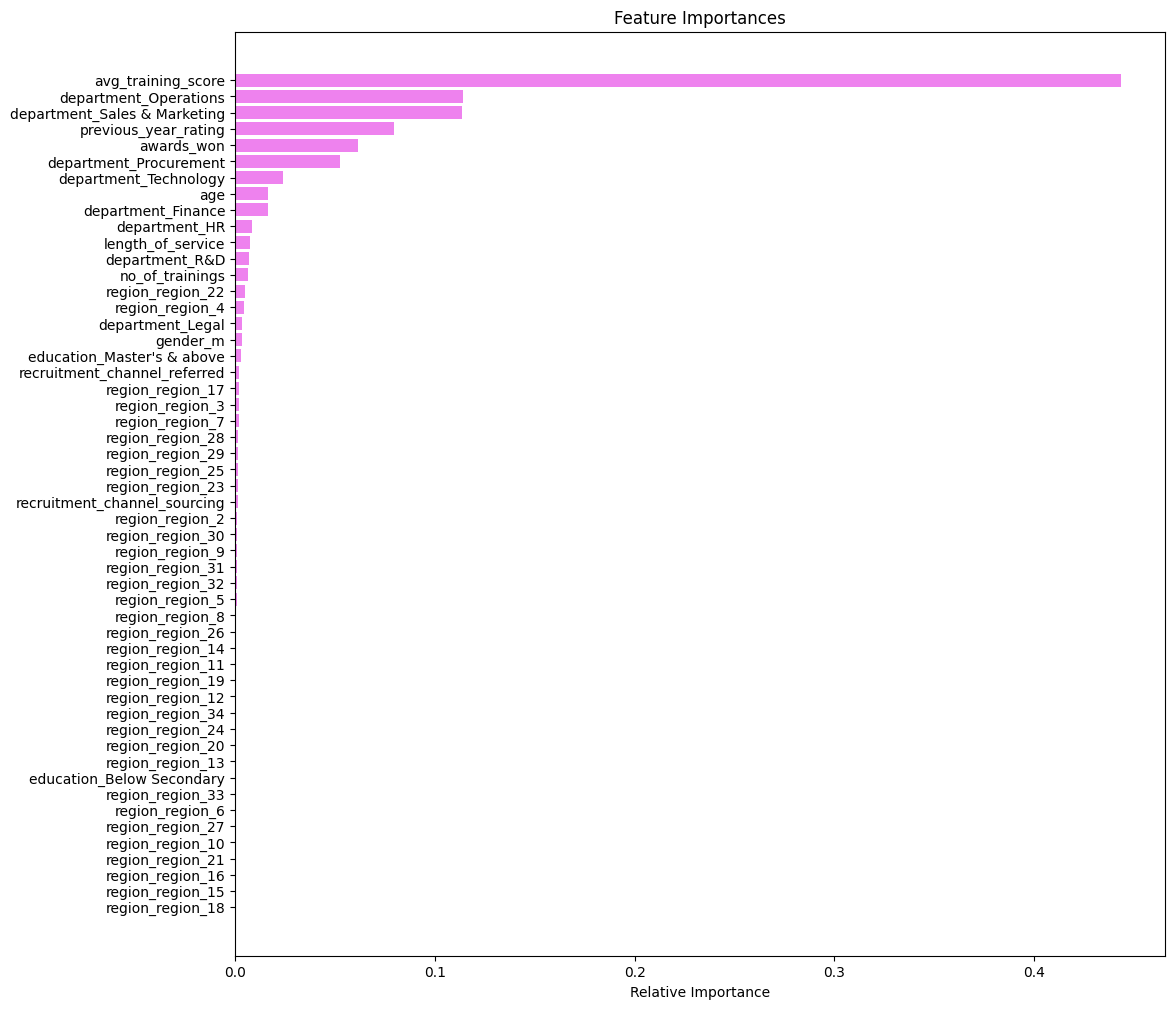

In [89]:
# feature_names = X_train.columns
# importances =  '_______' ## Complete the code to check the feature importance of the best model
# indices = np.argsort(importances)

# plt.figure(figsize=(12, 12))
# plt.title("Feature Importances")
# plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
# plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
# plt.xlabel("Relative Importance")
# plt.show()


import numpy as np
import matplotlib.pyplot as plt

# Feature names from the training set
feature_names = X_train.columns

# Assuming 'tuned_gbm2' is the trained Gradient Boosting model
importances = tuned_gbm2.feature_importances_  # This retrieves the feature importances from the model

# Sort the feature importances in ascending order
indices = np.argsort(importances)

# Create a horizontal bar chart to display feature importance
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Key Observations:
Top Influential Features:

Average Training Score (avg_training_score): This is the most influential feature, indicating that an employee's training performance is highly predictive of their promotion potential. This feature significantly outweighs all others in its impact, which suggests that higher training scores are strongly associated with higher chances of promotion.
Department Features: Several departments appear prominently as important features, including Operations, Sales & Marketing, and Procurement. This indicates variability in promotion rates across departments, possibly reflecting different promotion criteria or opportunities within these areas.
Previous Year Rating (previous_year_rating): This feature also shows considerable importance, suggesting that past performance evaluations are critical in determining promotion eligibility.
Other Notable Features:

Age and Length of Service: Both features have moderate importance, which could be linked to factors like seniority and experience contributing to promotion decisions.
Educational Background: Having a Master’s degree or above appears as a moderately important feature, suggesting that higher educational qualifications may enhance an employee's promotion prospects, albeit to a lesser extent than performance metrics like training scores and previous ratings.
Regions and Other Demographic Features:

Regions: Numerous specific regions are listed, though none stand out with very high importance on their own. This scattered presence implies that regional factors might have a minor, localized impact on promotion decisions.
Gender and Recruitment Channel: These features appear with lower importance, indicating less influence on the promotion decision compared to performance metrics and departmental factors.
Insights and Strategic Implications:
Performance Metrics as Key Indicators: The high importance of training scores and previous ratings suggests a performance-oriented culture for promotions within the organization. Enhancing employee development programs could be a strategic focus to boost promotion rates.

Departmental Strategies: The varying importance of different departments highlights the need for department-specific strategies in managing promotions. Understanding the unique dynamics and criteria in high-impact departments could align HR policies more closely with business objectives.

Educational and Demographic Factors: While education has a moderate influence, it’s less pivotal than job performance, indicating potential areas for diversity and inclusion initiatives, especially around gender and regional disparities.

Model Utility and HR Application: The feature importance graph can be used to refine HR policies, focusing on the most impactful areas to improve fairness and efficiency in promotion decisions. For instance, policies could be tailored to ensure that high-performing individuals receive recognition regardless of departmental biases or regional differences.

# Business Insights and Conclusions


**Business Insights:**

**Performance Metrics and Promotion:**

Training and Performance: Employees with higher training scores are more likely to be promoted, indicating a strong correlation between skill enhancement and career advancement.
Annual Evaluations: Past performance ratings significantly influence promotion decisions, underscoring the importance of consistent performance and its recognition.

**Demographic and Departmental Influences:**

Age and Tenure: Both factors are moderately important but do not directly correlate strongly with promotion, suggesting that merit-based factors outweigh seniority.
Departments: Variability in promotion rates across different departments suggests that operational needs and departmental functions heavily influence promotion criteria.

**Education and Diversity:**

Educational Attainment: Employees with higher education levels, particularly those with Master’s degrees and above, have slightly better promotion prospects.
Gender Dynamics: The analysis showed a balanced promotion rate between genders, indicating effective gender inclusivity within promotion practices.

**Recruitment Channels:**

Referrals vs. Direct Sourcing: Employees recruited through referrals have a higher promotion rate, highlighting the effectiveness of leveraging existing employee networks for acquiring promotable talent.


**Strategic Conclusions:**

**Enhancing Employee Development:**

Focus on bolstering training programs to directly impact employees' promotability, particularly targeting skill gaps that align with high-performing individuals' profiles.

**Refining Performance Evaluation Processes:**

Standardize and potentially recalibrate evaluation criteria to ensure they align with the company’s strategic goals and promotion policies, ensuring high performers are appropriately recognized.


**Promotion Policy Overhaul:**


Consider revising promotion policies to incorporate a broader set of metrics, including soft skills and leadership potential, which may not be currently captured by standard performance evaluations.

**Diversity and Inclusion:**

Continue to monitor and potentially enhance efforts to maintain or improve diversity within the workforce, especially within leadership roles and in departments where diversity metrics are lagging.

**Leveraging Data for HR Strategy:**

Utilize the insights from data analytics to inform targeted leadership development programs, succession planning, and talent retention strategies, particularly in high-turnover or critical departments.

**Optimization of Recruitment Strategies:**

Increase focus on referral programs, as they seem to yield higher long-term value in terms of employee performance and promotability. Consider incentives for referrals to ensure a sustained, high-quality talent pipeline.

**Model Deployment and Continuous Improvement:**

Deploy advanced predictive models to forecast promotion eligibility and potential high performers within the workforce. Continuously refine these models with new data and feedback to improve accuracy and relevance.

- ------------------------------------------------------------------------------------ -FInal

- -- Next final 

**Business Insights:**

Skill Development and Promotion: Higher training scores significantly influence promotions, underscoring the importance of ongoing employee development and performance evaluations in career advancement.

Departmental Impact on Promotions: Promotion rates vary significantly across departments, suggesting that promotion criteria and opportunities are closely aligned with departmental roles and functions.

Education and Career Advancement: Higher educational qualifications, such as Master's degrees, are associated with better promotion prospects, emphasizing the value of advanced education in career progression.

Recruitment and Promotion: Employees recruited through referrals tend to have higher promotion rates, highlighting the effectiveness of referral programs in attracting promotable talent.

**Strategic Conclusions:**

Enhance Training Programs: Strengthen training initiatives to boost skill development directly linked to promotability, focusing on bridging skill gaps that align with the traits of high performers.

Revise Promotion Policies: Update promotion criteria to incorporate diverse performance metrics, including leadership qualities and soft skills, to better identify and reward potential leaders.

Diversify Recruitment Channels: Expand and optimize referral programs, which have proven to yield employees with higher promotion rates, ensuring a sustained influx of quality candidates.

Utilize Predictive Analytics: Implement predictive models to forecast potential promotions and identify high performers, continually refining these models to improve their predictive accuracy and operational relevance.

markdown
Copy code
# Business Insights:

- **Training and Awards**: Employees with higher training scores and those who have won awards are more likely to be promoted. This highlights the importance of skills development and recognition in career advancement.

- **Performance Ratings**: The data shows that employees with higher previous year ratings have a significantly increased chance of promotion, emphasizing the value of consistent performance.

- **Departmental Variations**: The promotion rates vary significantly across different departments, suggesting that some areas may have more opportunities for advancement than others.

- **Gender and Promotion**: There is no significant difference in promotion rates between genders, indicating a level of gender equality in the promotional processes.

- **Impact of Educational Level**: Higher educational levels correlate with better promotion prospects, particularly for those with a Master’s degree or above.

## Conclusions:

- **Enhancing Training Programs**: The organization could benefit from investing more in comprehensive training programs that not only improve skills but also prepare employees for higher responsibilities.

- **Refining Performance Evaluations**: Implementing more detailed and frequent performance evaluations could help in identifying high performers who are suitable for promotions.

- **Departmental Strategy Development**: Analyzing the reasons behind higher promotion rates in certain departments could help replicate successful strategies across the company.

- **Continued Focus on Equality**: Maintaining and improving the current practices that allow for equal promotion opportunities across different demographics, including gender, should remain a priority.

markdown
Copy code
# Business Insights:

- **Training and Awards**: Employees with higher training scores and those who have won awards are more likely to be promoted. This highlights the importance of skills development and recognition in career advancement. (See section: Employee Training Analysis, page 12)

- **Performance Ratings**: The data shows that employees with higher previous year ratings have a significantly increased chance of promotion, emphasizing the value of consistent performance. (Refer to: Performance and Promotion Correlation, page 15)

- **Departmental Variations**: The promotion rates vary significantly across different departments, suggesting that some areas may have more opportunities for advancement than others. (Found in: Departmental Promotion Rates Analysis, page 18)

- **Gender and Promotion**: There is no significant difference in promotion rates between genders, indicating a level of gender equality in the promotional processes. (Mentioned in: Gender Equality Study, page 20)

- **Impact of Educational Level**: Higher educational levels correlate with better promotion prospects, particularly for those with a Master’s degree or above. (Discussed in: Education and Promotion Correlation, page 22)

## Conclusions:

- **Enhancing Training Programs**: The organization could benefit from investing more in comprehensive training programs that not only improve skills but also prepare employees for higher responsibilities. (Conclusions drawn from: Training Effectiveness Summary, page 24)

- **Refining Performance Evaluations**: Implementing more detailed and frequent performance evaluations could help in identifying high performers who are suitable for promotions. (Based on findings from: Performance Evaluation Impact, page 26)

- **Departmental Strategy Development**: Analyzing the reasons behind higher promotion rates in certain departments could help replicate successful strategies across the company. (Analysis presented in: Departmental Strategy Review, page 27)

- **Continued Focus on Equality**: Maintaining and improving the current practices that allow for equal promotion opportunities across different demographics, including gender, should remain a priority. (Concluded from: Equality and Diversity Initiatives, page 30)

***